In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
import re
from mpl_toolkits.axes_grid1 import ImageGrid

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPool1D, BatchNormalization, Dropout, LSTM, Embedding, GlobalMaxPool1D, Reshape
from keras.utils.vis_utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from tabulate import tabulate

import plotly.graph_objects as go
from ipywidgets import widgets
import plotly.io as pio

In [2]:
# Set style
sns.set_theme()
pio.templates.default = "seaborn"

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
df = pd.read_csv('tcc_ceds_music.csv')

In [5]:
# NOT USED - will be discarded later
def generate_unique_lyrics_words():
    """
    Must be run only once in order to generate the '.txt' file with unique words.
    Parameters:
        None
    Return: 
        None
    """
    words_lyrics = []
    words_lyrics_unique = []

    for i in df['lyrics']:
        words_in_song = i.split(' ')
        for word in words_in_song:
            words_lyrics.append(word)

    for word in words_lyrics:
        if word not in words_lyrics_unique:
            words_lyrics_unique.append(word)

    with open('unqiue_word.txt', 'w') as f:
        for word in words_lyrics_unique:
            try:
                f.write(word + ' ')
            except UnicodeEncodeError:
                pass
            
def get_unique_lyrics_words() -> list:
    """
    Retrieves the list of unique lyrics words from the "unique_word.txt" file.
    Params:
        None
    Return:
        words: list - list of unqiue lyrics words
    """
    unique_words = []
    with open('unqiue_word.txt','r') as f:
        lines = f.readlines()
        words = lines[0].split('')
    return words
        


<AxesSubplot:xlabel='genre', ylabel='count'>

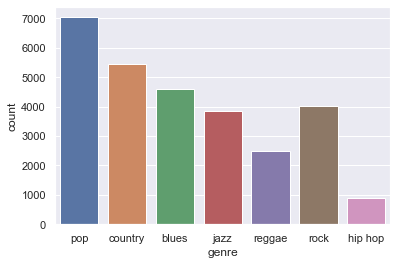

In [6]:
sns.countplot(x='genre',data=df)

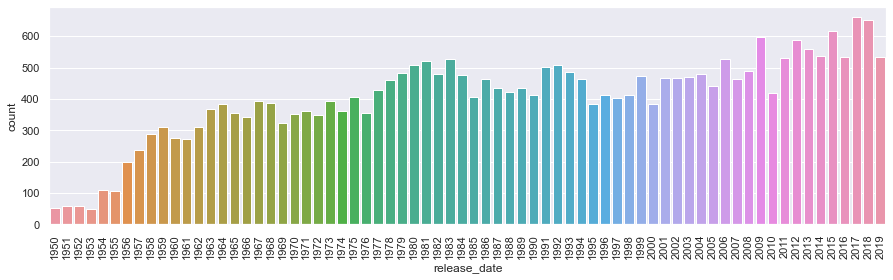

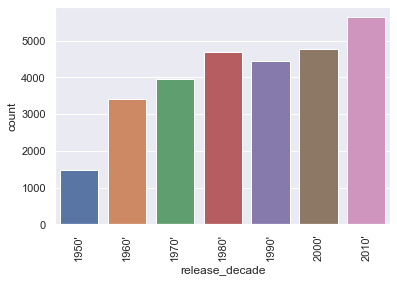

In [7]:
plt.figure(figsize=(15,4))
sns.countplot(x='release_date',data=df)
plt.xticks(rotation=90)
plt.show()
df['release_decade'] = df.apply(lambda row: str(int(row.release_date / 10) * 10) + "'", axis = 1)
sns.countplot(x='release_decade',data=df)
plt.xticks(rotation=90)
print()

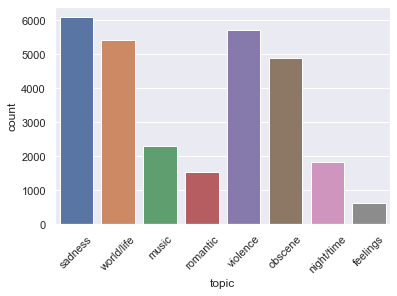

In [8]:
sns.countplot(x='topic',data=df)
plt.xticks(rotation=45)
print()

In [9]:
# clean = []
# stop_words = stopwords.words('english')
# stop_words.append('chorus')
# stop_words.append('verse')
# lemmatizer = WordNetLemmatizer()

In [10]:
# for index, row in df.iterrows():
#     lyrics = row['lyrics']
#     lyrics = re.sub('\n', "", lyrics)
#     lyrics = re.sub('x1', "", lyrics)
#     lyrics = re.sub('x2', "", lyrics)
#     lyrics = re.sub('x3', "", lyrics)
#     lyrics = re.sub('x4', "", lyrics)
#     lyrics = re.sub('x5', "", lyrics)
#     lyrics = re.sub('x6', "", lyrics)
#     lyrics = re.sub('x7', "", lyrics)
#     lyrics = re.sub('x8', "", lyrics)
#     lyrics = re.sub('x9', "", lyrics)
#     lyrics = lyrics.lower() #lowercasing
#     lyrics = re.sub("[^a-z]+", " ", lyrics) #remove all numbers and special chars
#     lyrics = lyrics.split()
#     lyrics = [word for word in lyrics if not word in stop_words] #remove stopwords
#     lyrics = [lemmatizer.lemmatize(token) for token in lyrics] #lemmatize
#     lyrics = [lemmatizer.lemmatize(token, "v") for token in lyrics]
#     lyrics = " ".join(lyrics)
#     clean.append(lyrics)
# df['clean_lyrics'] = clean #add clean lyrics to a new column in the dataframe

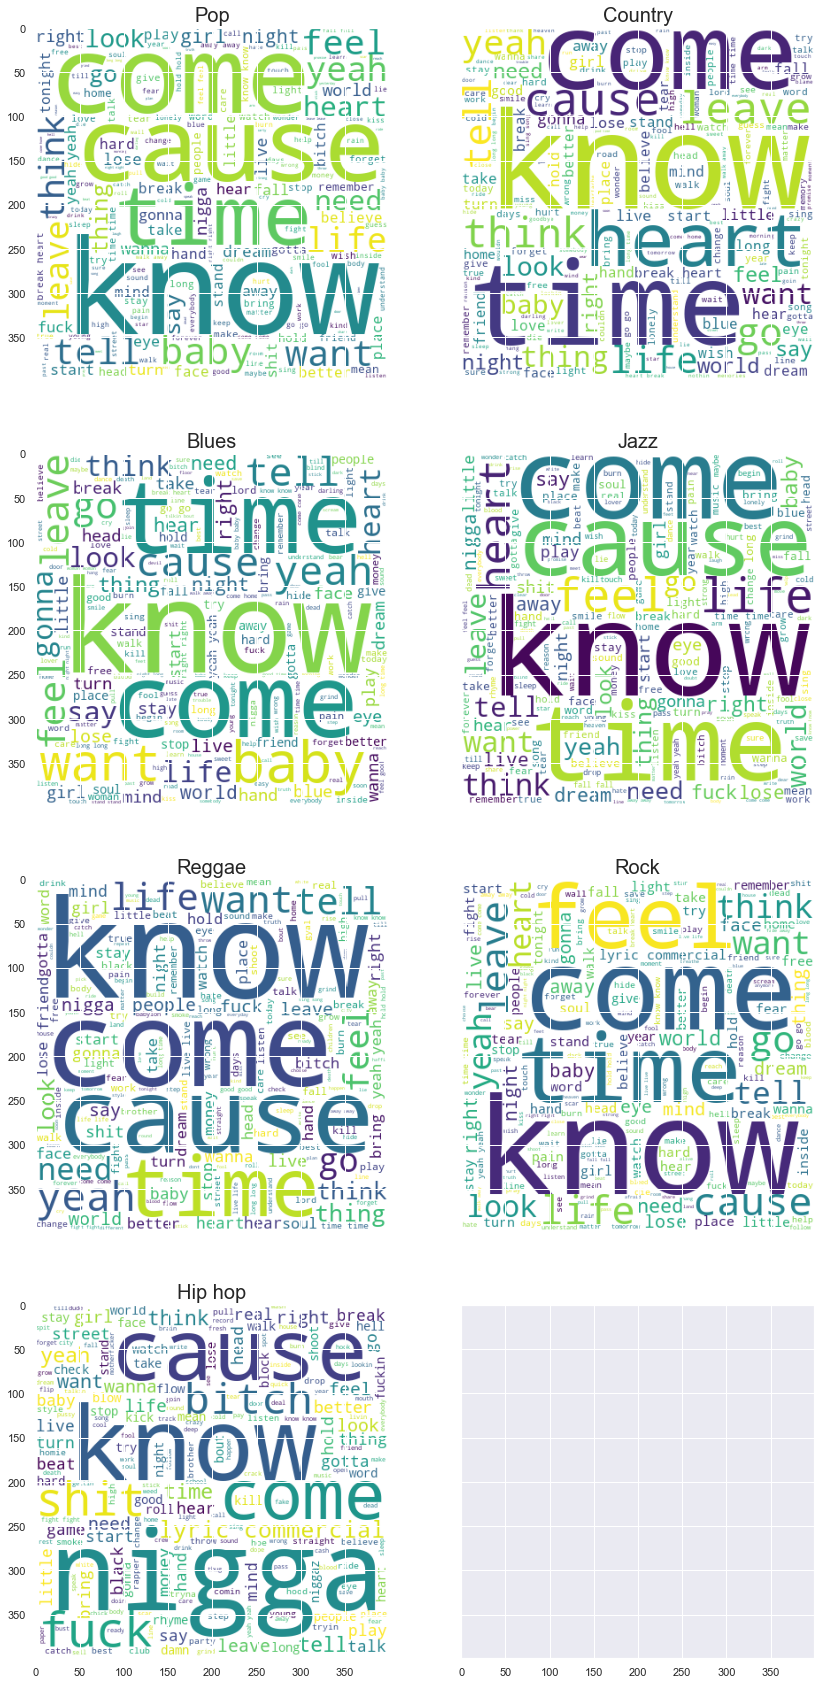

In [11]:
list_genres = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']
dict_genres_words = {}
for genre in list_genres:
    dict_genres_words[genre] = ' '.join(df[df.genre == genre].lyrics.values)
    
wordcloud_figures = []
figure_titles = []
for genre in dict_genres_words:
    figure_titles.append(genre.capitalize())
    wordcloud_figures.append(WordCloud(width=400, height=400, background_color='white', repeat=False).generate(dict_genres_words[genre]))

fig = plt.figure(1,(30, 30))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 2), axes_pad = 1)
for i in range(len(list_genres)):
    grid[i].imshow(wordcloud_figures[i])
    grid[i].set_title(figure_titles[i], size = 20)

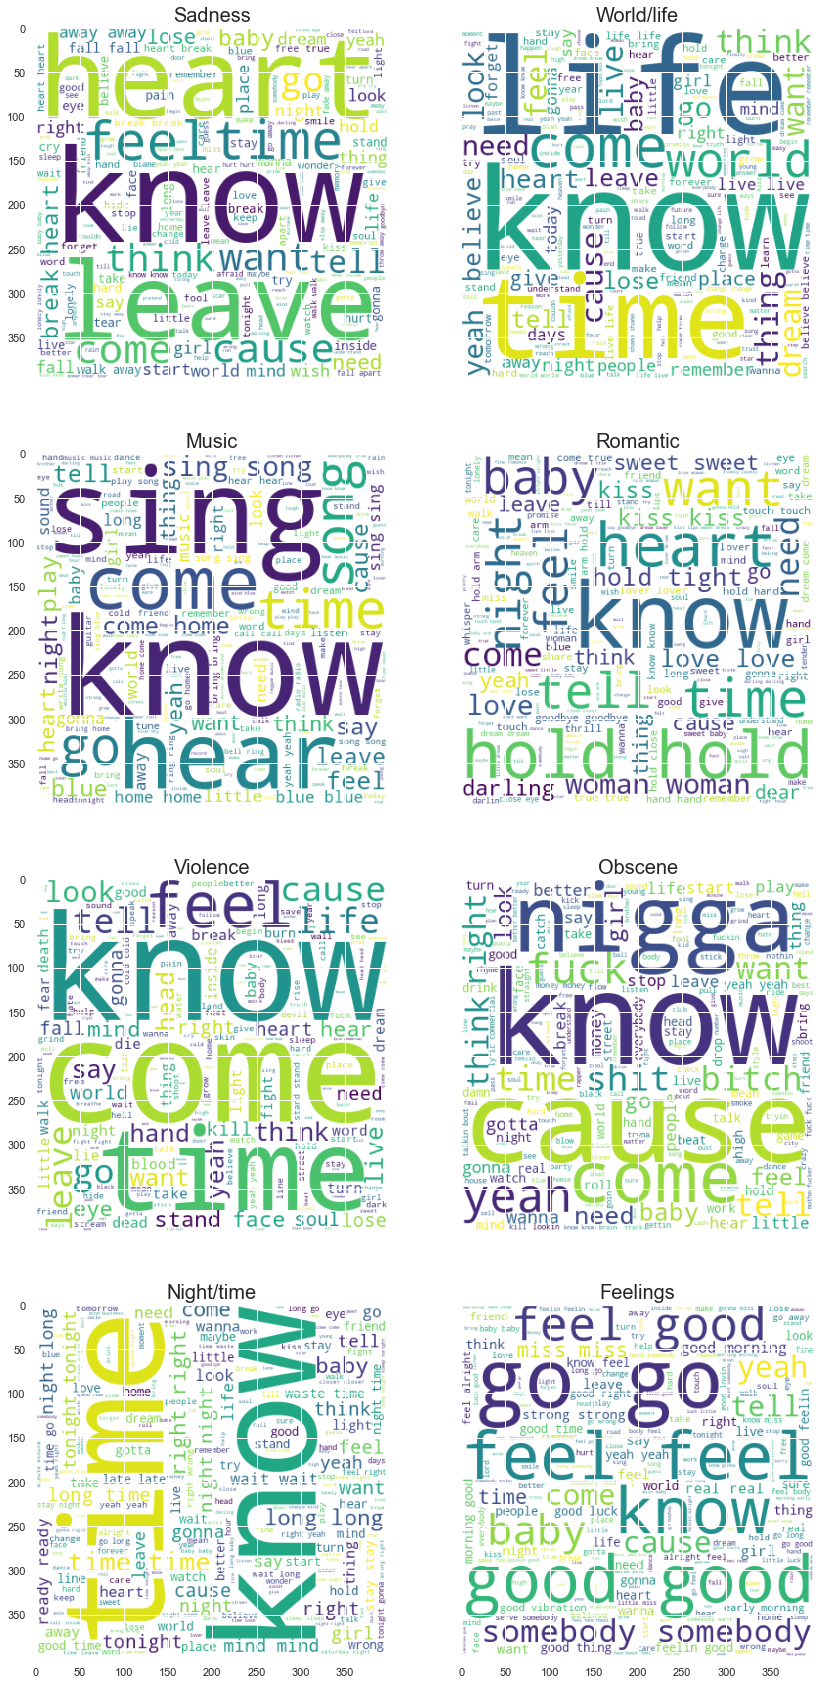

In [12]:
list_topics = ['sadness', 'world/life', 'music', 'romantic', 'violence', 'obscene', 'night/time', 'feelings']
dict_topics_words = {}
for topic in list_topics:
    dict_topics_words[topic] = ' '.join(df[df.topic == topic].lyrics.values)
    
wordcloud_figures = []
figure_titles = []
for topic in dict_topics_words:
    figure_titles.append(topic.capitalize())
    wordcloud_figures.append(WordCloud(width=400, height=400, background_color='white', repeat=False).generate(dict_topics_words[topic]))

fig = plt.figure(1,(30, 30))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 2), axes_pad = 1)
for i in range(len(list_topics)):
    grid[i].imshow(wordcloud_figures[i])
    grid[i].set_title(figure_titles[i], size = 20)

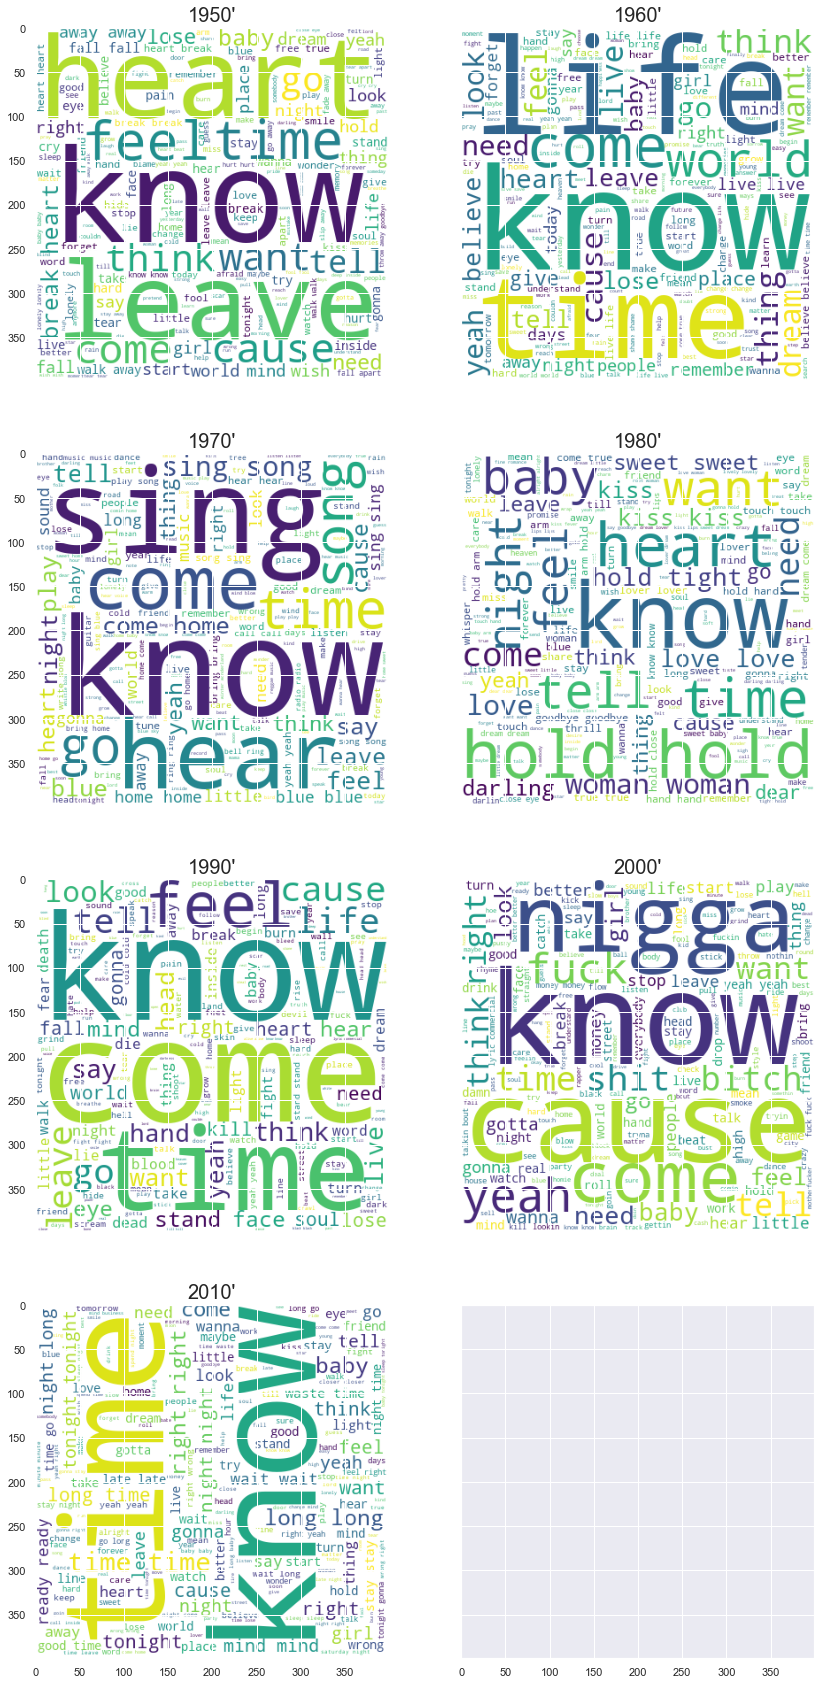

In [13]:
list_release_decades = ["1950'", "1960'", "1970'", "1980'", "1990'", "2000'", "2010'"]
dict_release_decades_words = {}
for release_decade in list_release_decades:
    dict_release_decades_words[release_decade] = ' '.join(df[df.release_decade == release_decade].lyrics.values)
    
for release_decade in list_release_decades:
    wordcloud_figures.append(WordCloud(width=400, height=400, background_color='white', repeat=False, collocations = False).generate(dict_release_decades_words[release_decade]))

fig = plt.figure(1,(30, 30))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 2), axes_pad = 1)
for i in range(len(list_release_decades)):
    grid[i].imshow(wordcloud_figures[i])
    grid[i].set_title(list_release_decades[i], size = 20)

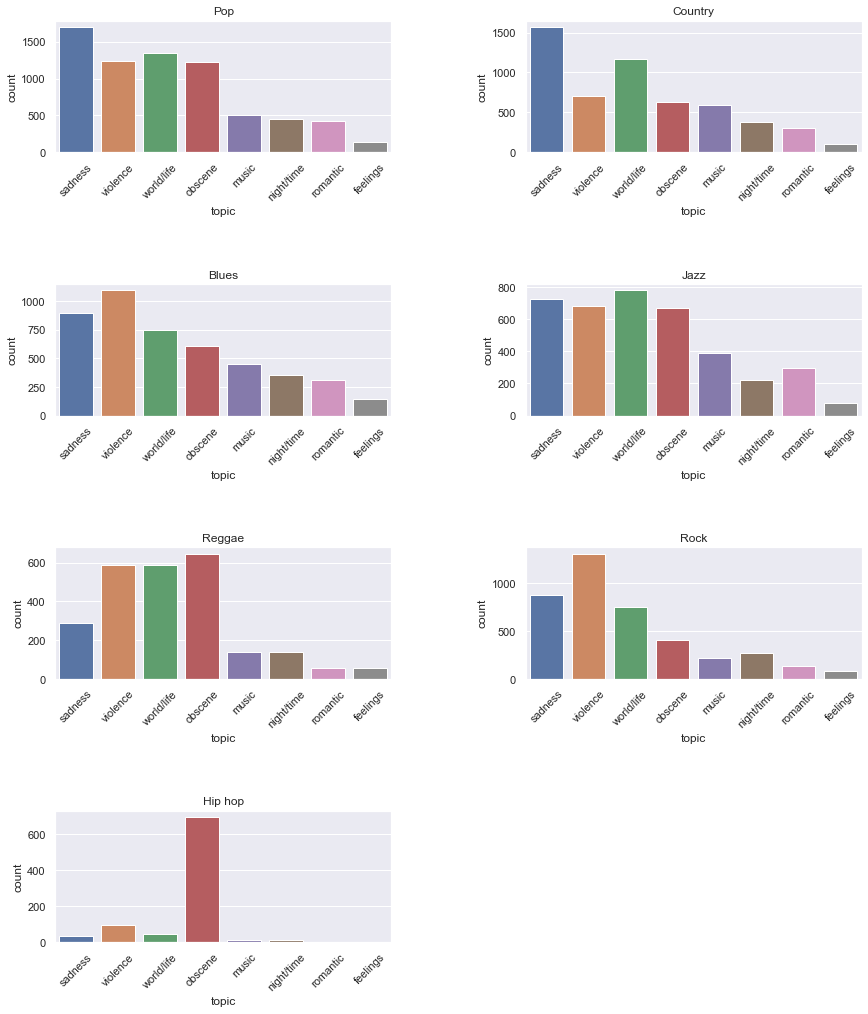

In [14]:
plt.figure(1, figsize=(14, 16))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=1)

for i in range(len(list_genres)):
    plt.subplot(4,2,i+1)
    sns.countplot(x='topic',data=df[df.genre == list_genres[i]], order = df.topic.value_counts().index)
    plt.xticks(rotation=45)
    plt.title(list_genres[i].capitalize())

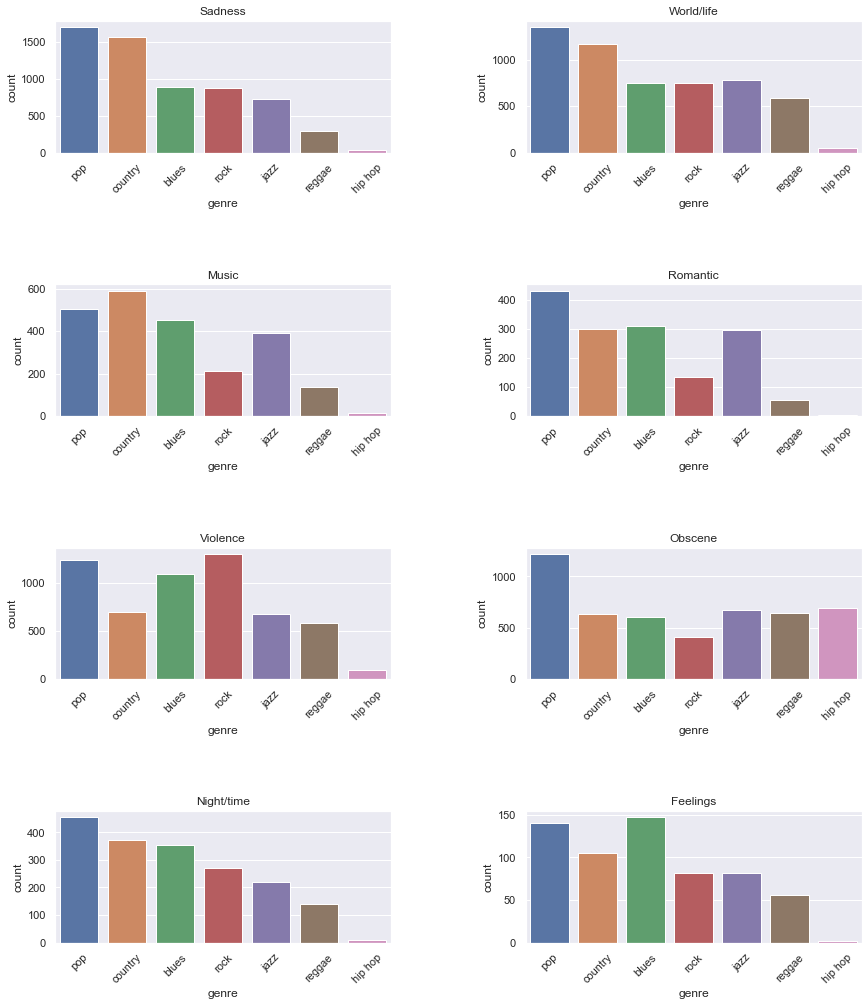

In [15]:
plt.figure(2, figsize=(14, 16))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=1)


for i in range(len(list_topics)):
    plt.subplot(4,2,i+1)
    sns.countplot(x='genre',data=df[df.topic == list_topics[i]], order = df.genre.value_counts().index)
    plt.xticks(rotation=45)
    plt.title(list_topics[i].capitalize())
plt.show()

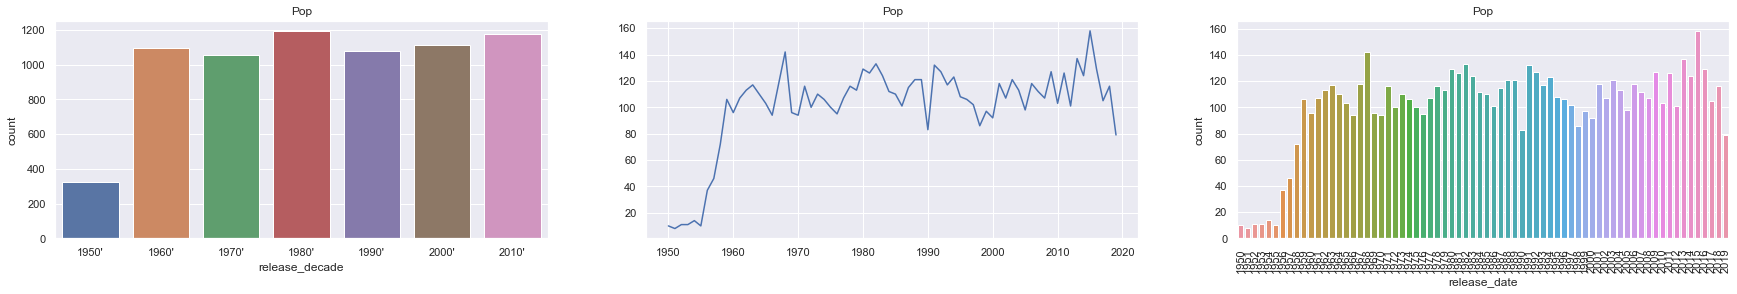

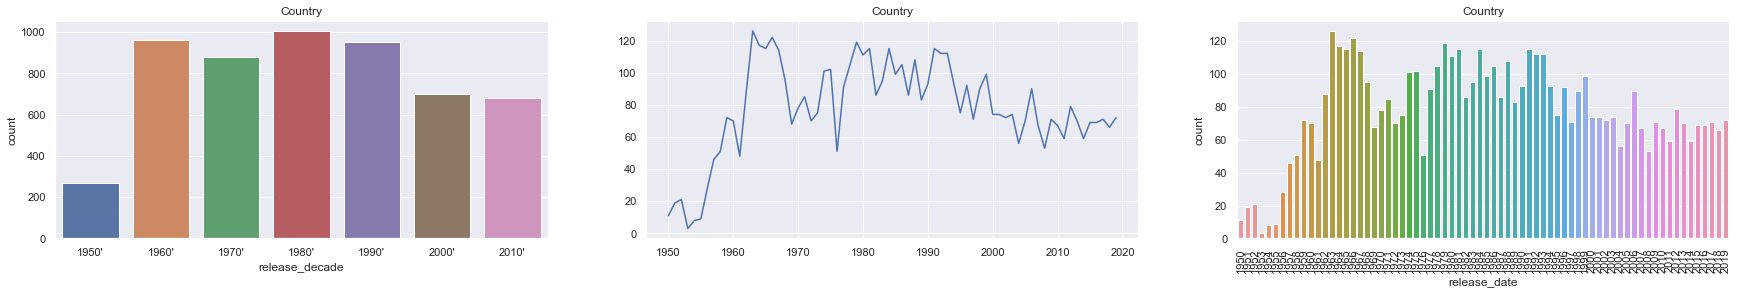

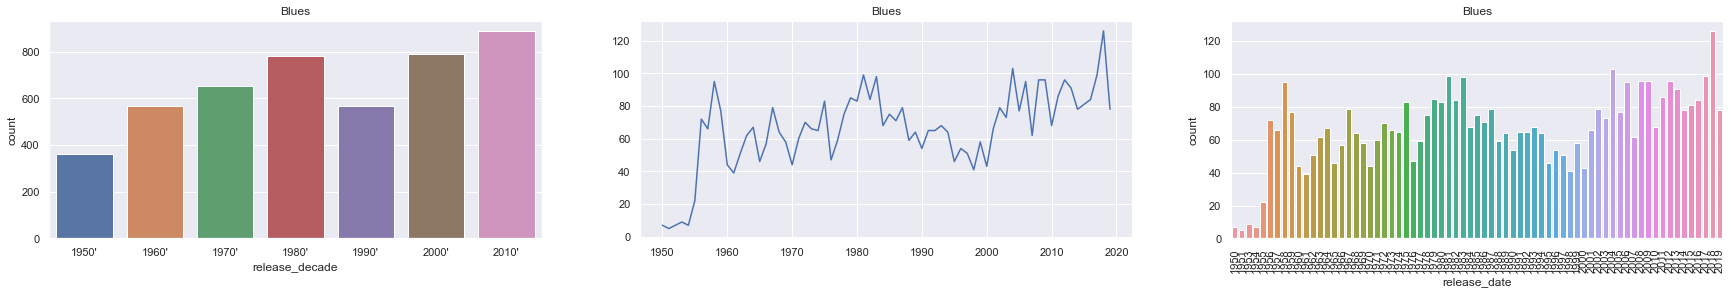

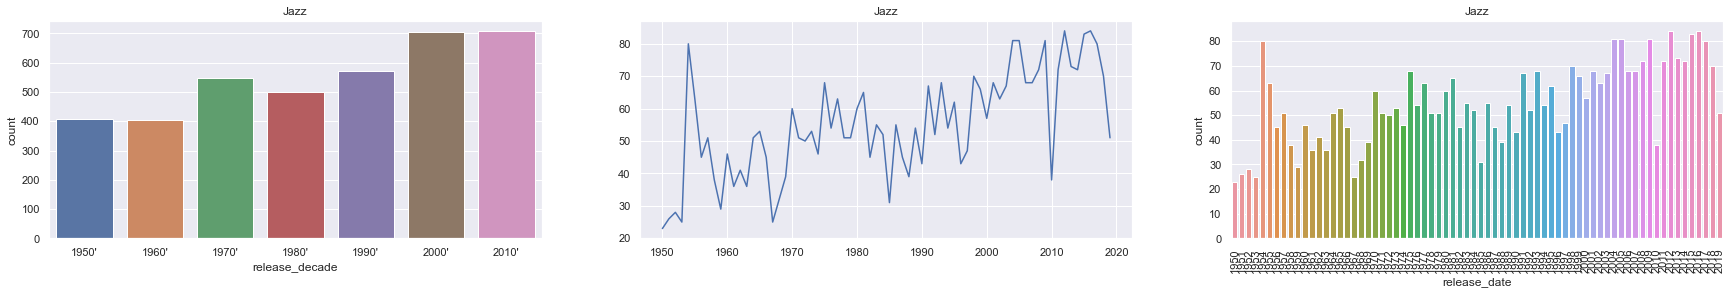

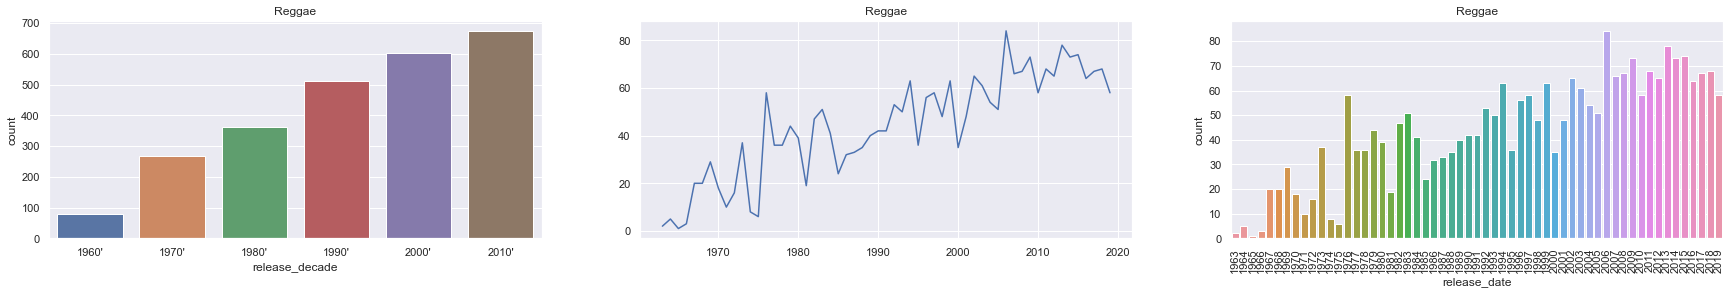

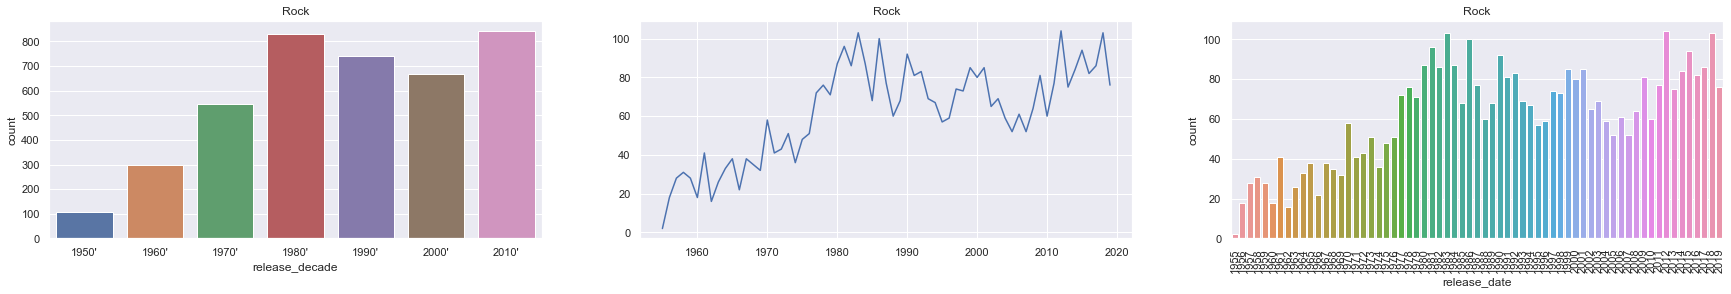

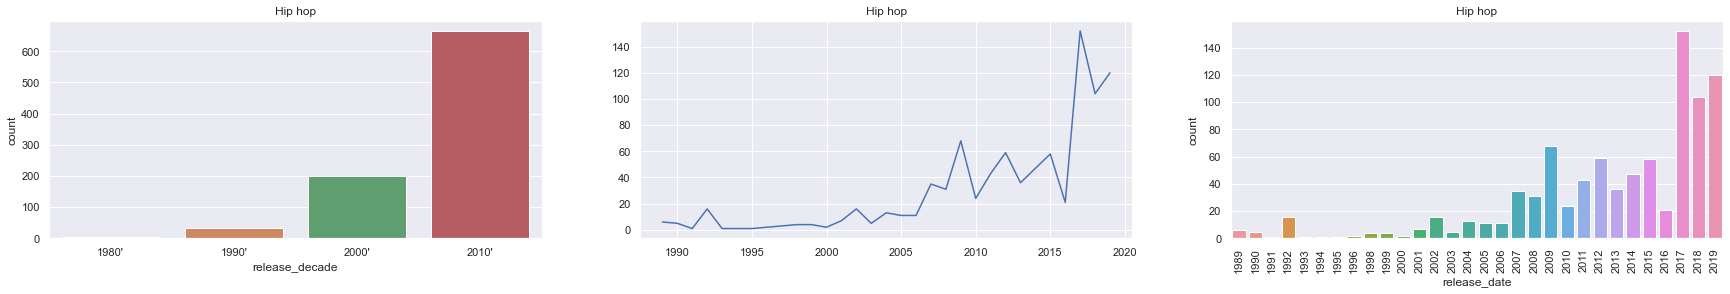

In [16]:
for i in range(len(list_genres)):
    fig, ax =plt.subplots(1,3, figsize=(30,4))
    df_genre = df[df.genre == list_genres[i]]
    
    plt.title(list_genres[i].capitalize())
    sns.countplot(x='release_decade',data=df_genre, ax=ax[0])
    ax[0].title.set_text(list_genres[i].capitalize())
    
    counts = df_genre['release_date'].value_counts(sort=False)
    sns.lineplot(x=counts.index, y=counts.values, ax=ax[1])
    ax[1].title.set_text(list_genres[i].capitalize())
    plt.xticks(rotation=90)
    sns.countplot(x='release_date',data=df_genre, ax=ax[2])
    plt.show()

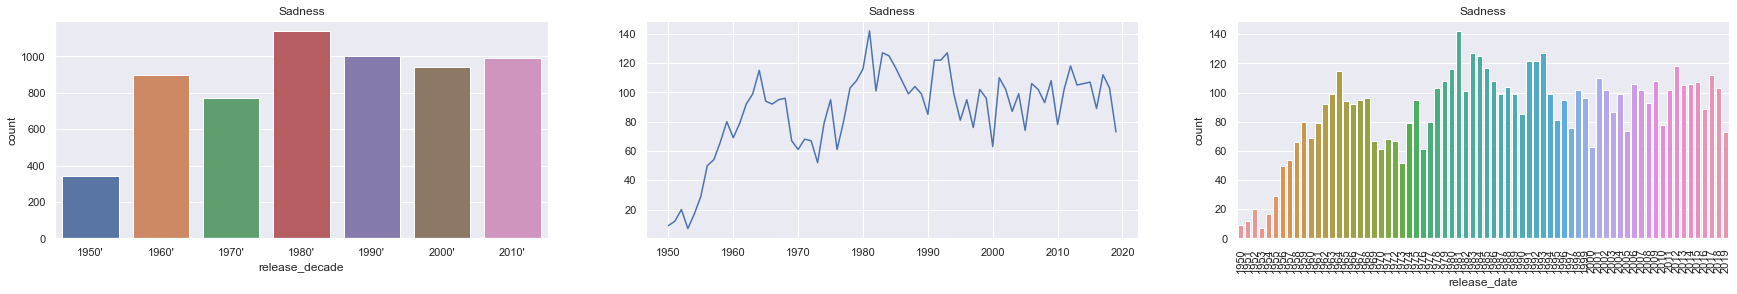

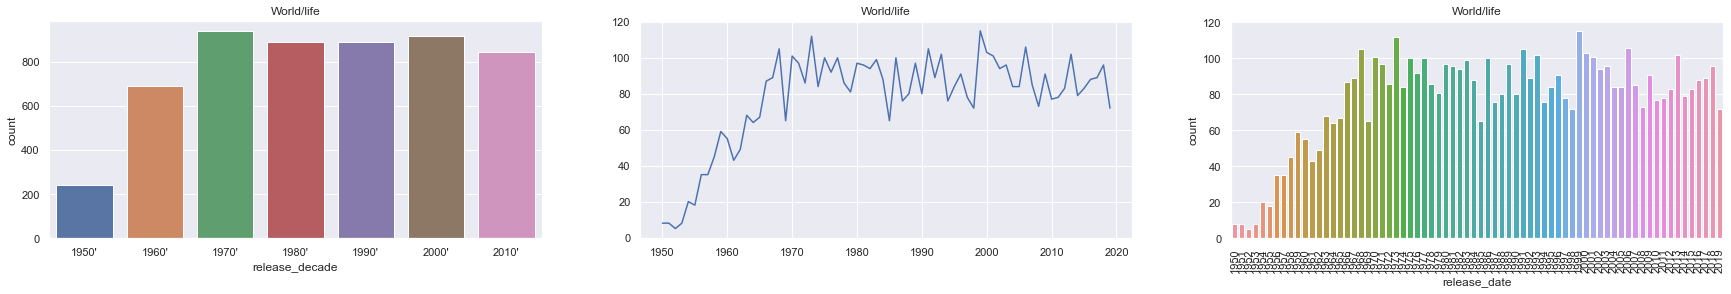

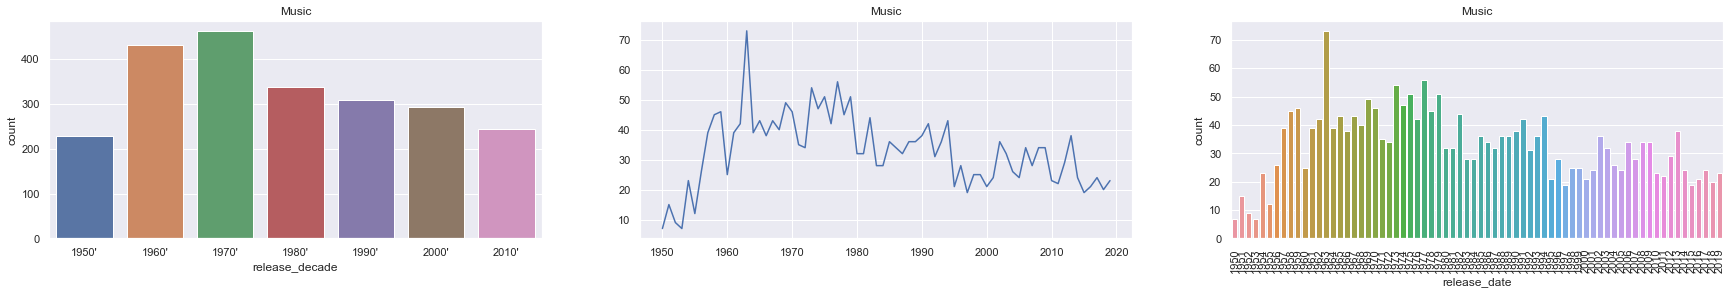

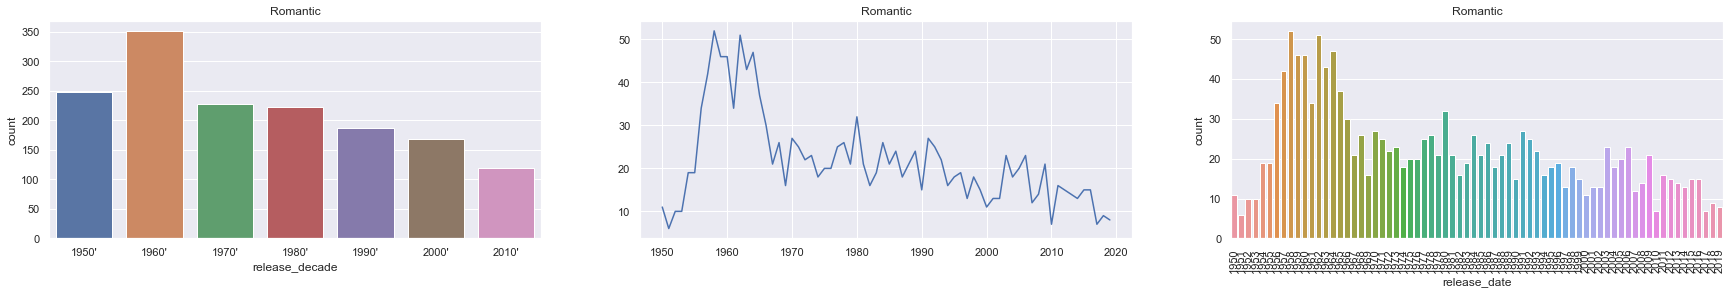

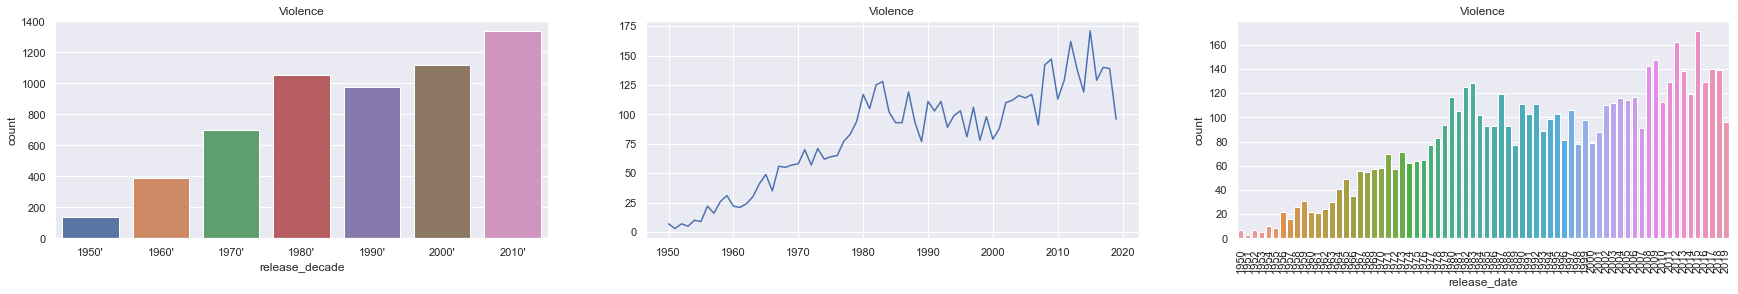

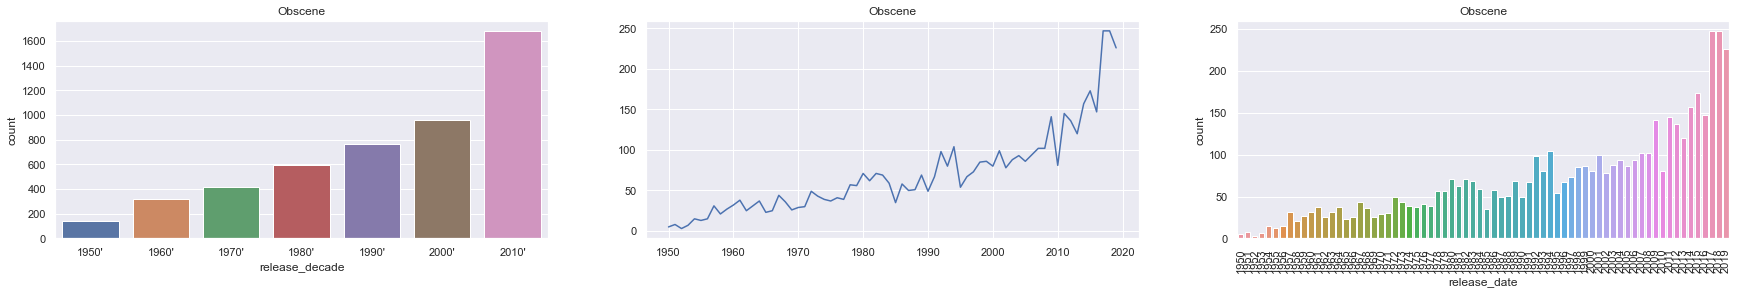

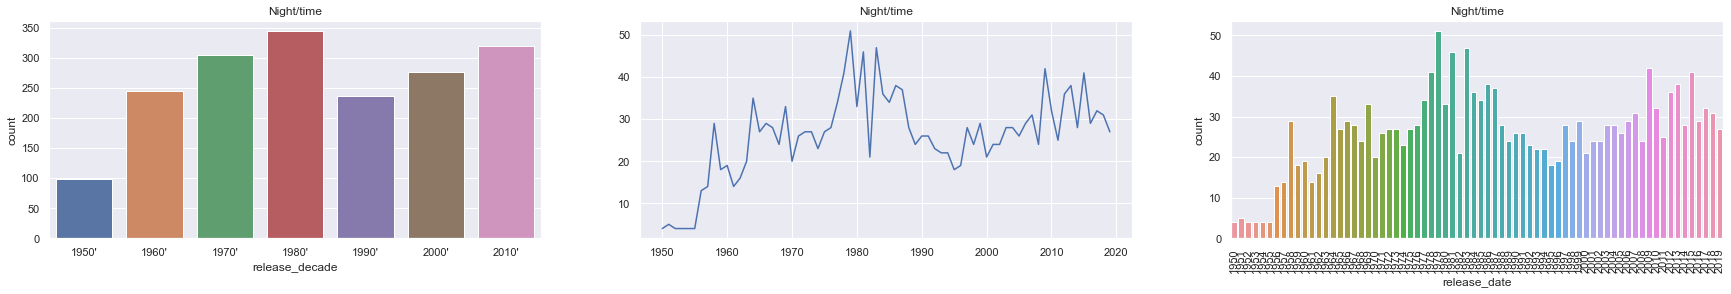

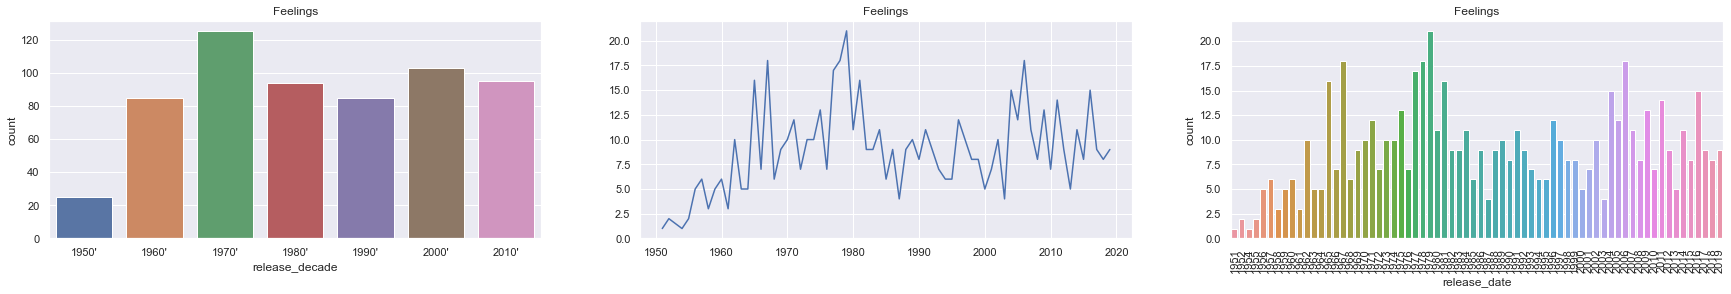

In [17]:
for i in range(len(list_topics)):
    fig, ax =plt.subplots(1,3, figsize=(30,4))
    df_topic = df[df.topic == list_topics[i]]
    
    plt.title(list_topics[i].capitalize())
    sns.countplot(x='release_decade',data=df_topic, ax=ax[0])
    ax[0].title.set_text(list_topics[i].capitalize())
    
    counts = df_topic['release_date'].value_counts(sort=False)
    sns.lineplot(x=counts.index, y=counts.values, ax=ax[1])
    ax[1].title.set_text(list_topics[i].capitalize())
    plt.xticks(rotation=90)
    sns.countplot(x='release_date',data=df_topic, ax=ax[2])
    plt.show()

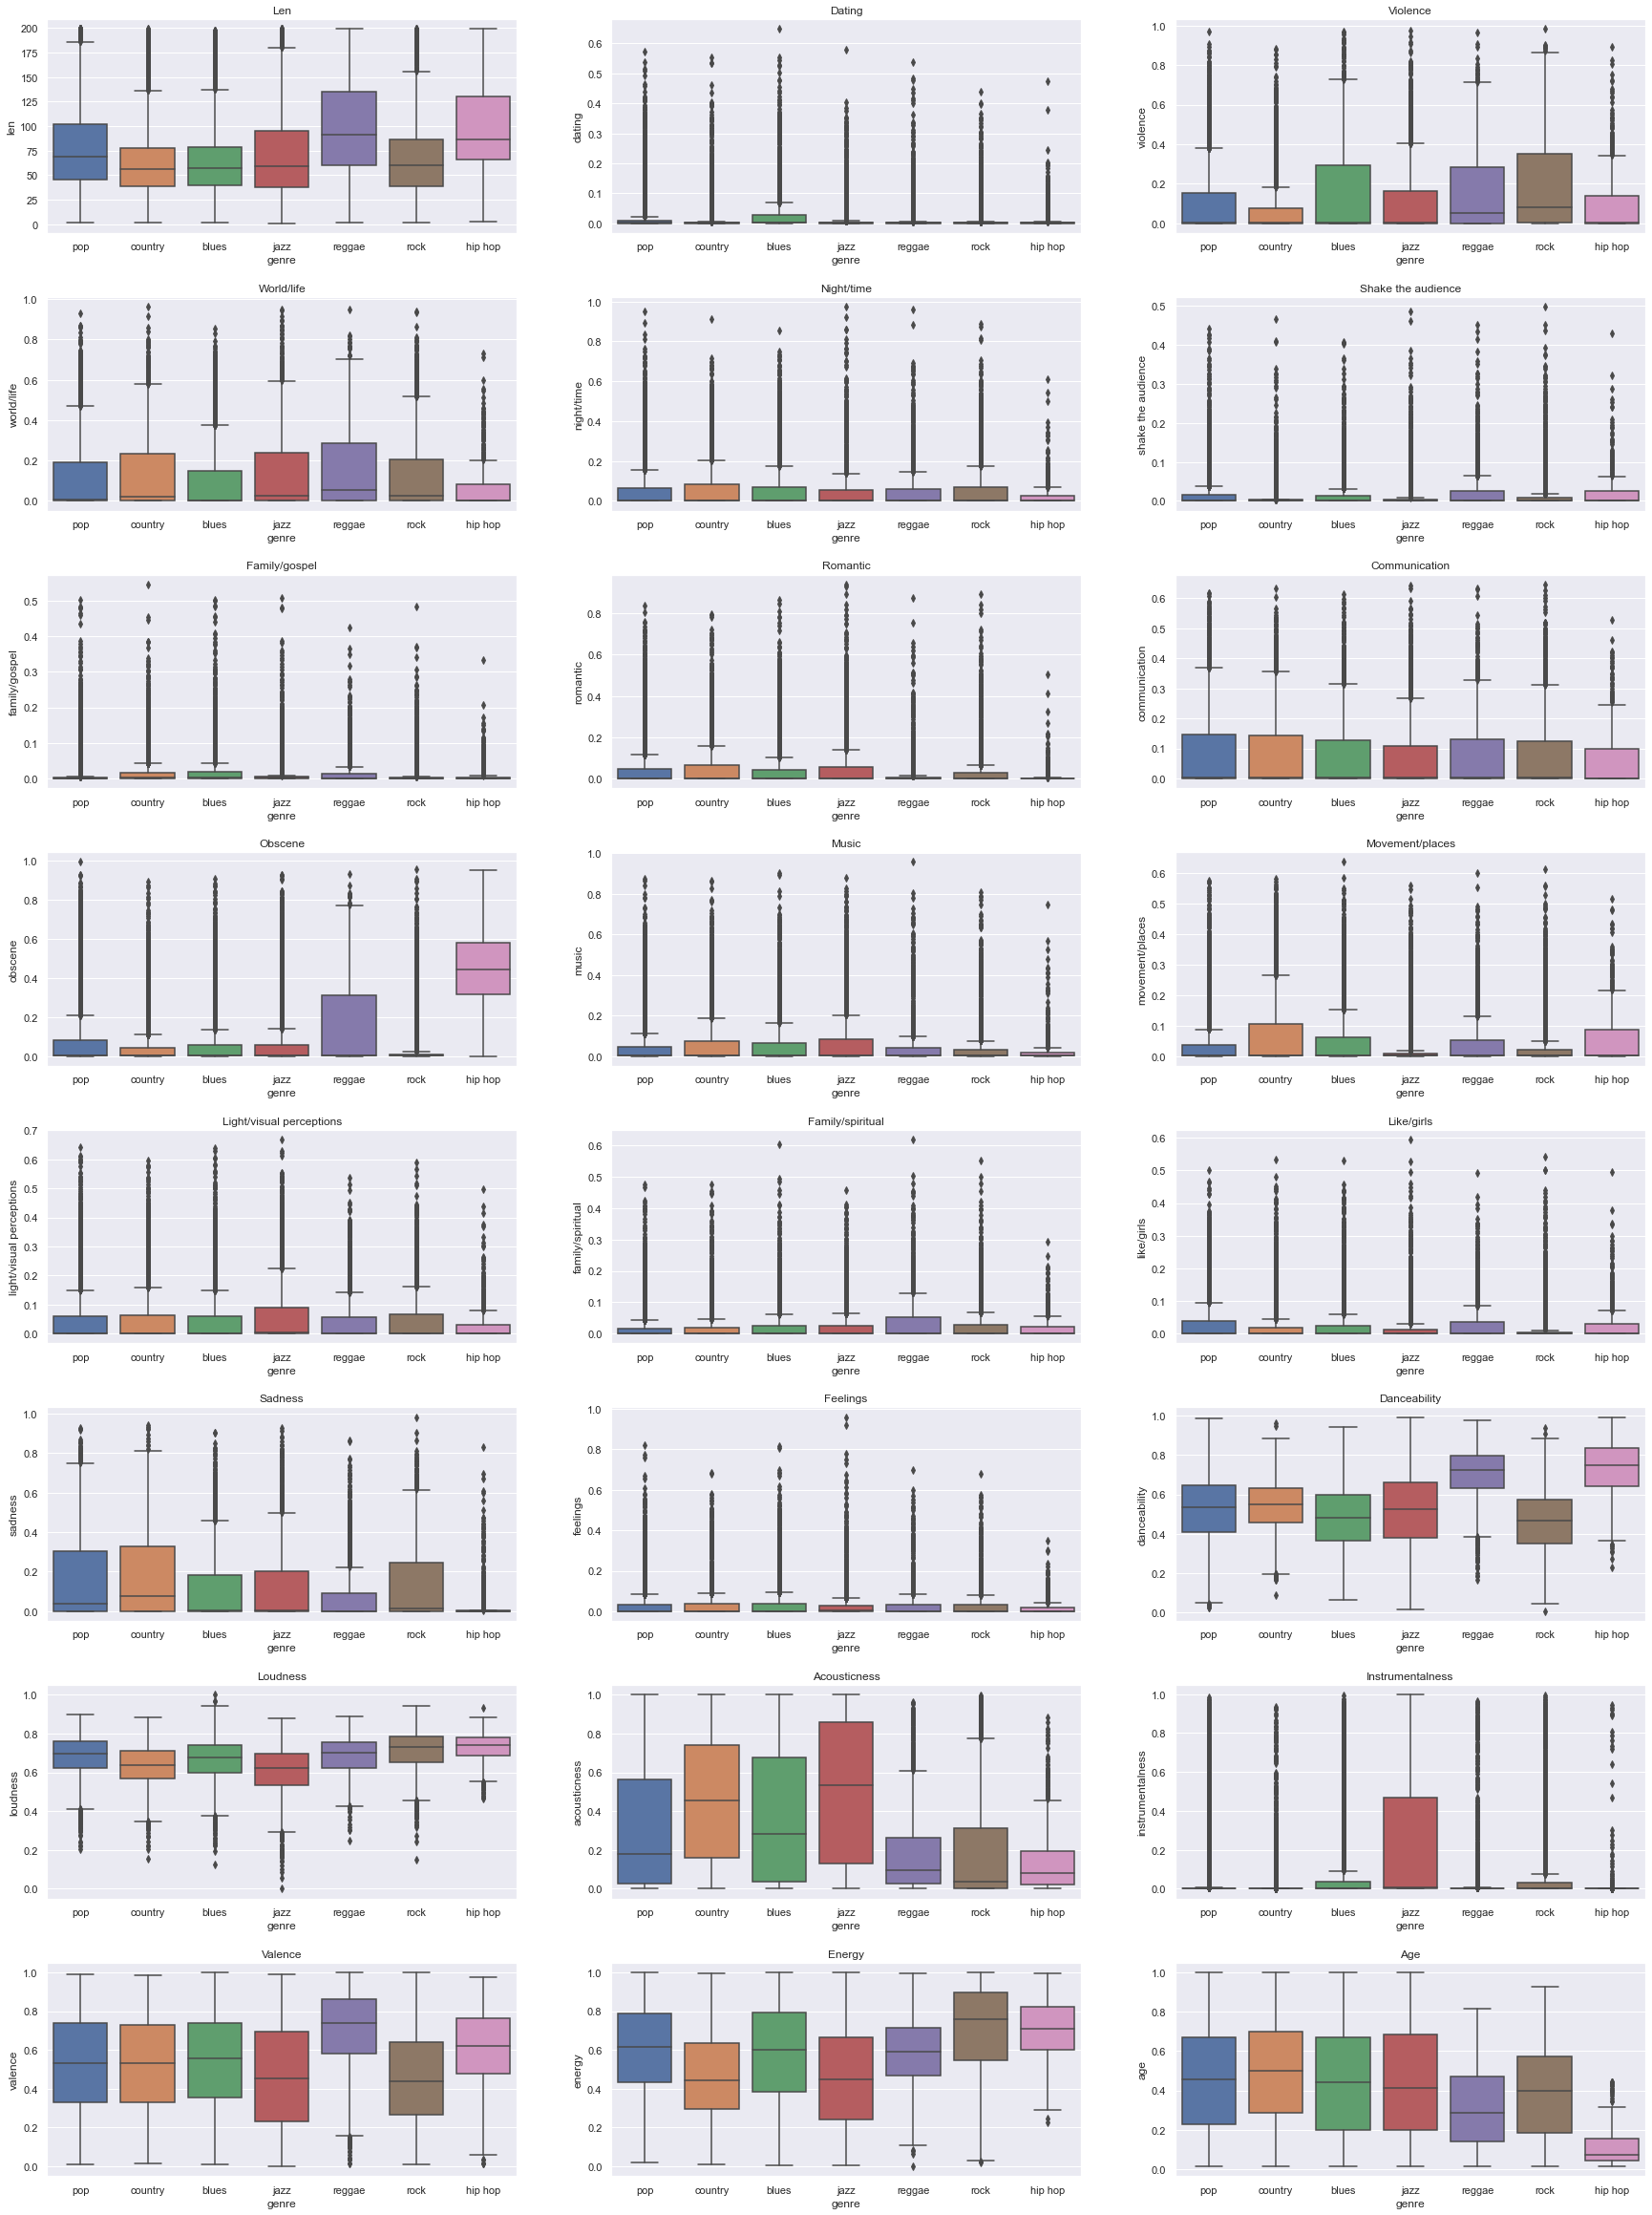

In [18]:
features = ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy','age']
fig, ax = plt.subplots(8,3, figsize=(30,32))
for i in range(len(features)):
    sns.boxplot(x="genre", y=features[i], data=df, ax = ax[int(i/3)][i%3])
    ax[int(i/3)][i%3].title.set_text(features[i].capitalize())
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3)

plt.show()

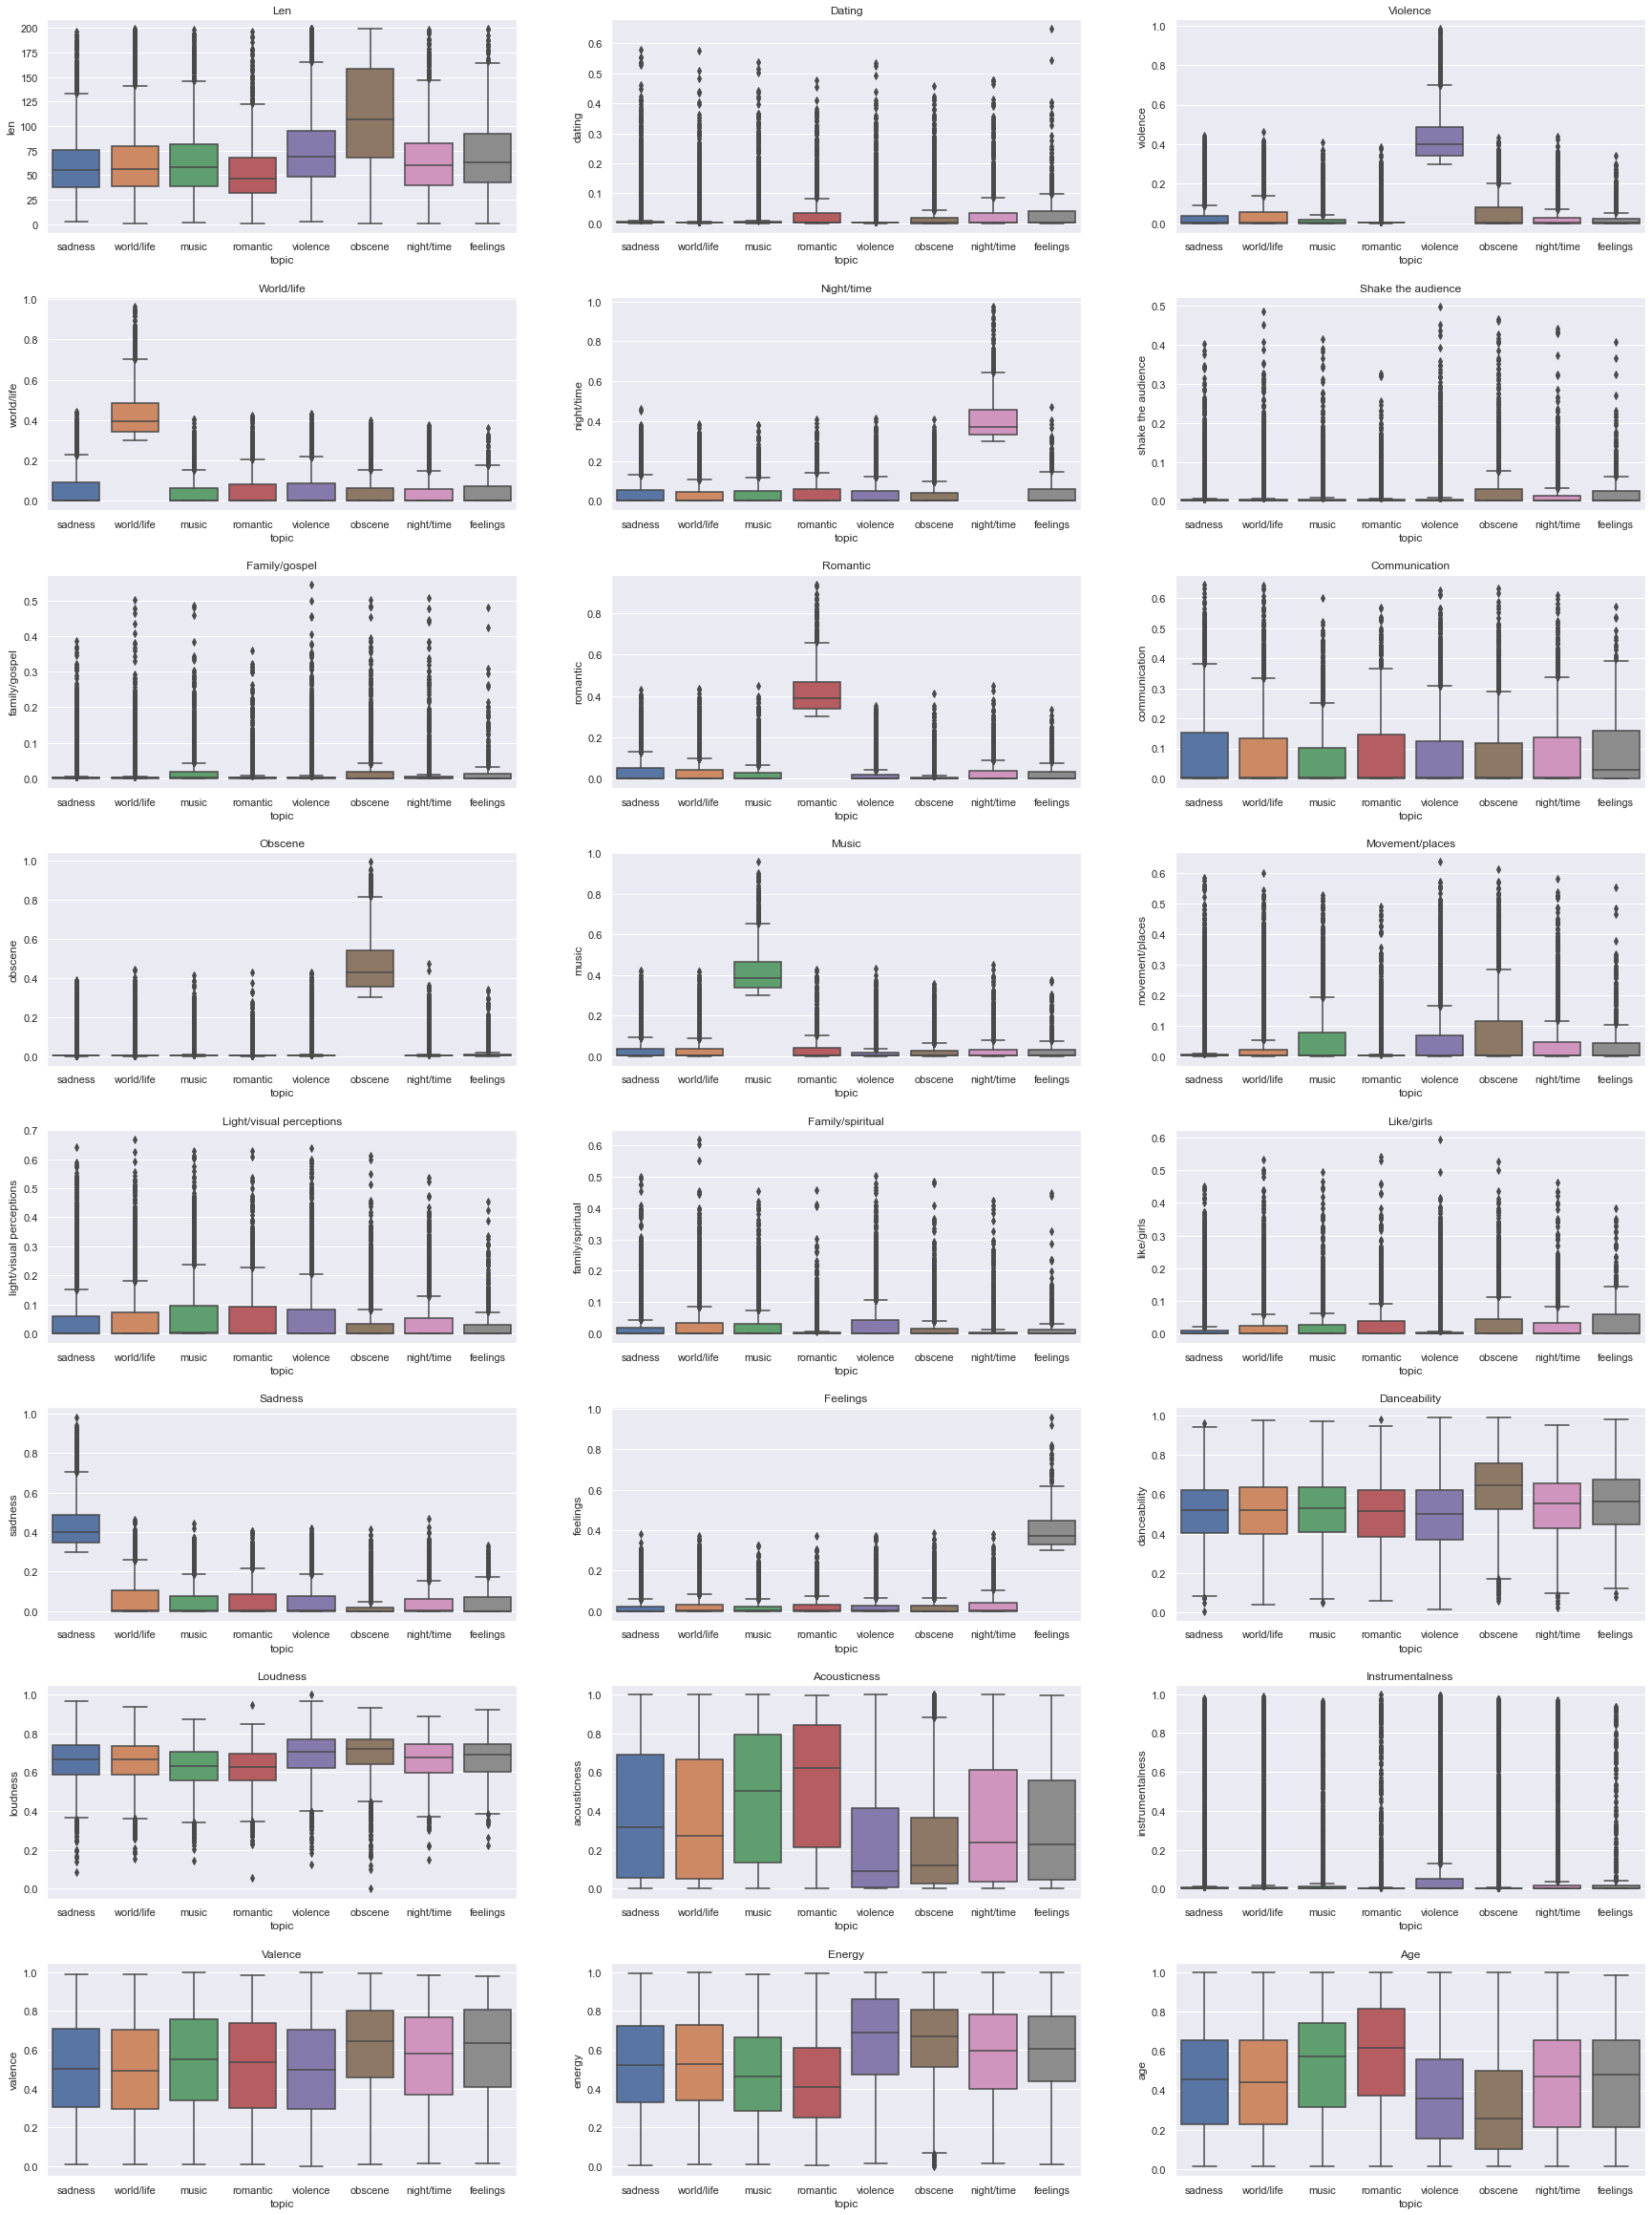

In [19]:
fig, ax = plt.subplots(8,3, figsize=(30,32))
for i in range(len(features)):
    sns.boxplot(x="topic", y=features[i], data=df, ax = ax[int(i/3)][i%3])
    ax[int(i/3)][i%3].title.set_text(features[i].capitalize())
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3)

plt.show()

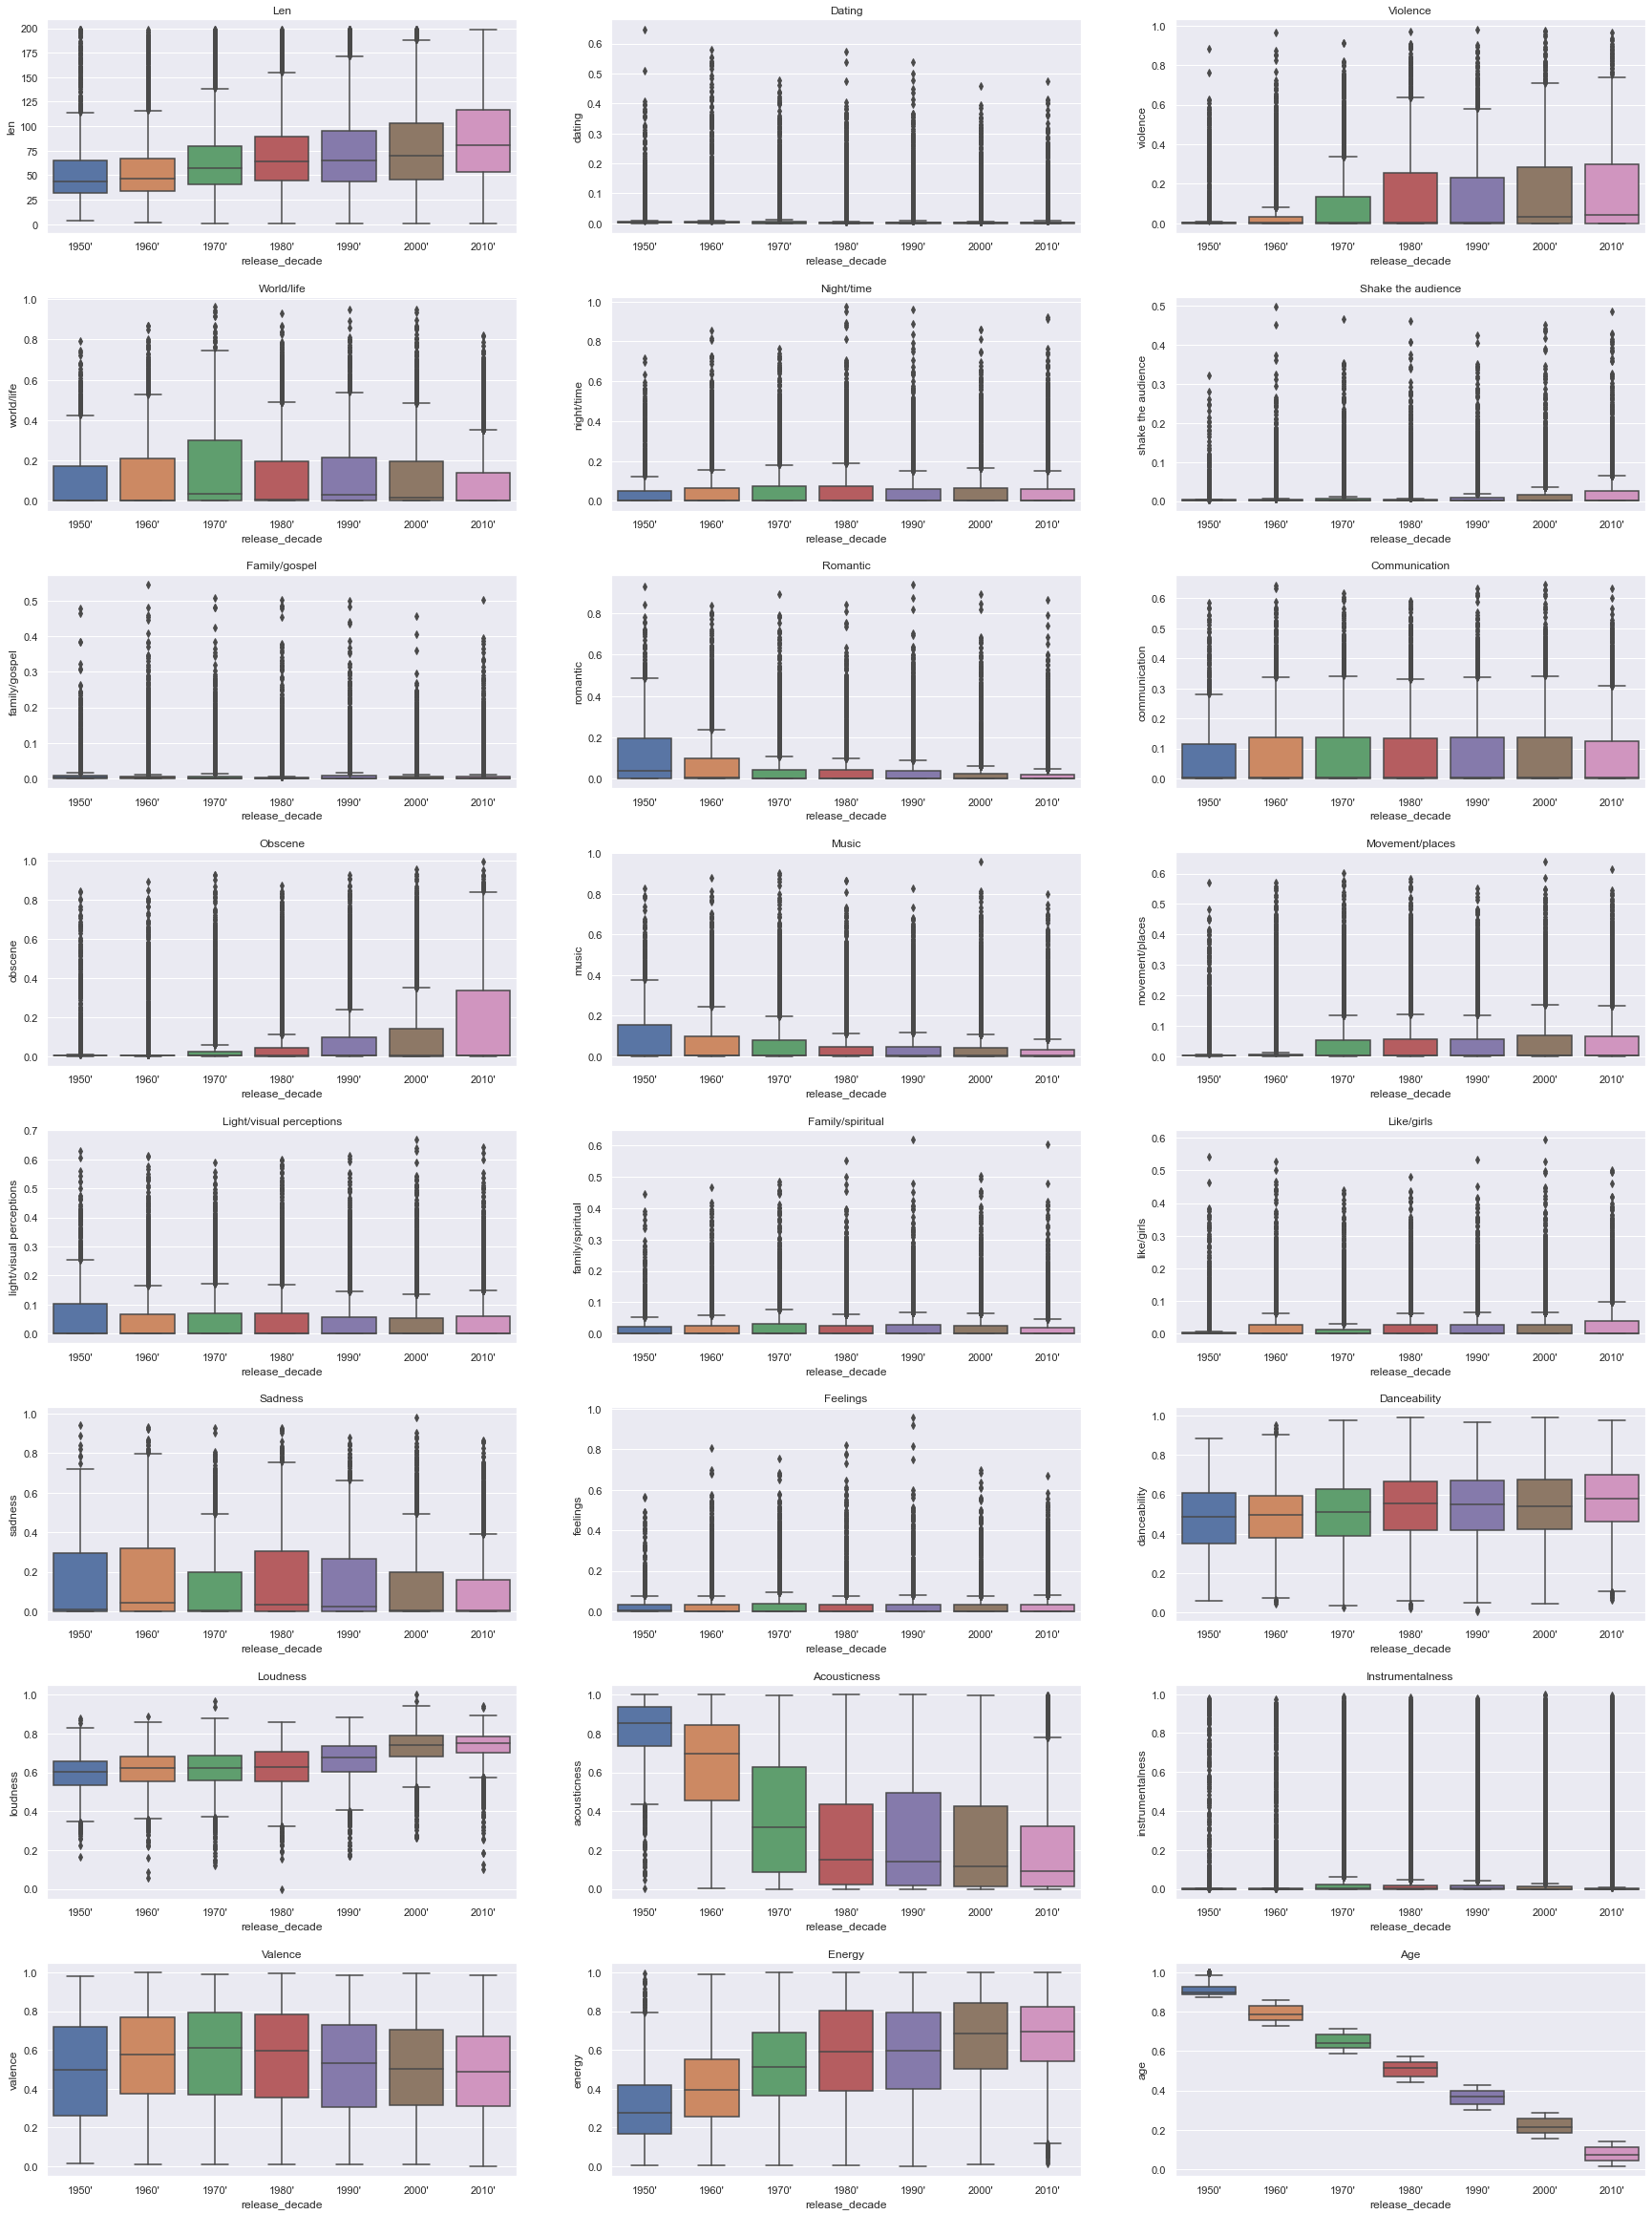

In [20]:
features = ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy','age']
fig, ax = plt.subplots(8,3, figsize=(30,32))
for i in range(len(features)):
    sns.boxplot(x="release_decade", y=features[i], data=df, ax = ax[int(i/3)][i%3])
    ax[int(i/3)][i%3].title.set_text(features[i].capitalize())
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3)

plt.show()

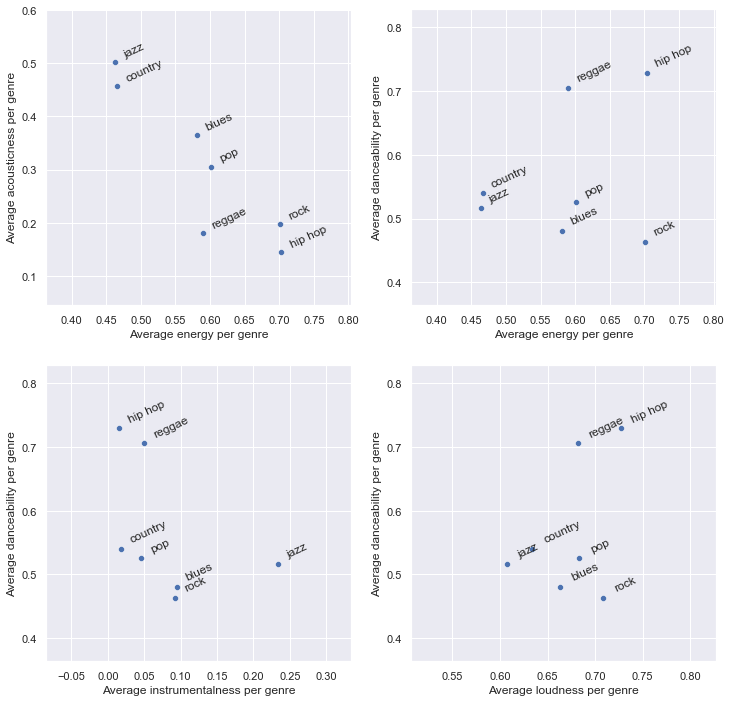

In [21]:
def plot_genres_by_two_measurements(measurement1:str, measurement2:str) -> None:
    """
    Takes the name of two columns and creates a scatterplot. In the plot, each genre is
    included. The point for each genre is set to the average of the columns for all the songs
    in the genre.
    Parmas:
        measurement1: str - string representing the name of the first column used (used as x)
        measurement2: str - string representing the name of the 2nd column used (used as y)
    Return:
        None
    """

    unique_genre = list(df['genre'].unique())

    avg_m1 = np.zeros(len(unique_genre))
    avg_m2 = np.zeros(len(unique_genre))

    for i in unique_genre:
        avg_m1[unique_genre.index(i)] = df[df['genre'] == i][measurement1].mean()
        avg_m2[unique_genre.index(i)] = df[df['genre'] == i][measurement2].mean()

    sns.scatterplot(x = avg_m1, y = avg_m2)

    for i in range(len(unique_genre)):
        plt.text(x = avg_m1[i] + 0.01, y = avg_m2[i] + 0.01, s = unique_genre[i], rotation = 25)


    plt.xlim(min(avg_m1)-0.1,max(avg_m1)+0.1)
    plt.ylim(min(avg_m2)-0.1,max(avg_m2)+0.1)
    xlabel = "Average "+ measurement1 + " per genre"
    plt.xlabel(xlabel)
    ylabel = "Average "+ measurement2 + " per genre"
    plt.ylabel(ylabel)
    
sns.set_theme()
plt.figure(1, figsize=(12, 12))
plt.subplot(2,2,1)
plot_genres_by_two_measurements('energy', 'acousticness')
plt.subplot(2,2,2)
plot_genres_by_two_measurements('energy', 'danceability')
plt.subplot(2,2,3)
plot_genres_by_two_measurements('instrumentalness', 'danceability')
plt.subplot(2,2,4)
plot_genres_by_two_measurements('loudness', 'danceability')

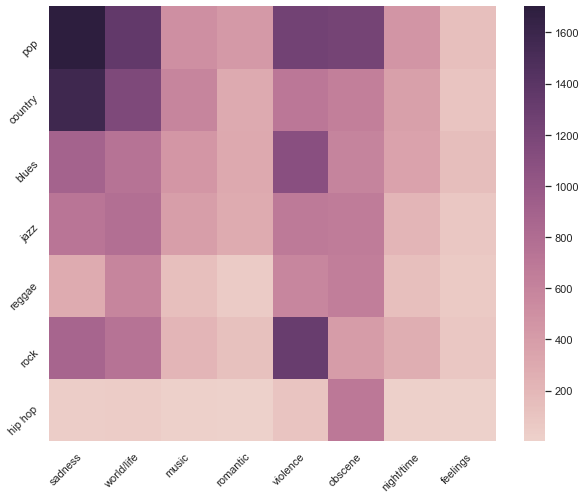

In [22]:
heatmap_genre_emotion = np.zeros((len(df['genre'].unique()), len(df['topic'].unique())))

unique_genre = list(df['genre'].unique())
unique_topic = list(df['topic'].unique())

for genre, topic in zip(df['genre'], df['topic']):
    heatmap_genre_emotion[unique_genre.index(genre), unique_topic.index(topic)] += 1

plt.figure(figsize = (10,8))
ax = sns.heatmap(heatmap_genre_emotion, cmap = sns.cubehelix_palette(as_cmap = True))
c = ax.set_yticks(np.arange(len(unique_genre))+0.65, unique_genre, rotation=45)
c = ax.set_xticks(np.arange(len(unique_topic))+0.3, unique_topic, rotation=45)

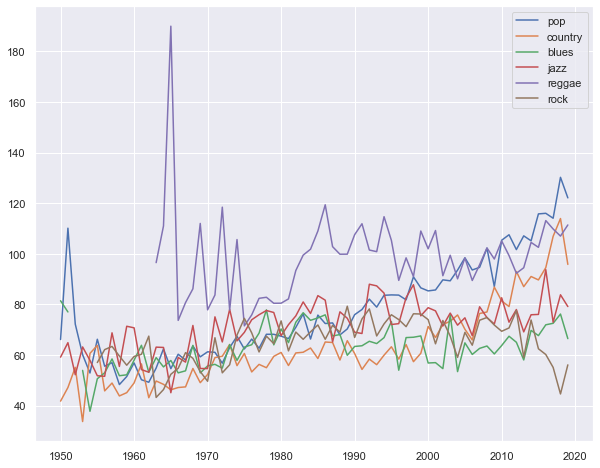

In [23]:
unique_genre = list(df['genre'].unique())
unique_years = list(df['release_date'].unique())

def extract_mean_len_per_genre_per_year():
    """
    Extract an array with the average len for the songs in each genre.
    Params:
        None
    Returns:
        time_series: np.array - an array with the size (no. of genres x
        no. of years) that contains the average len for the songs in each
        genre for each year.
    """
    time_series = np.zeros((len(unique_genre), len(unique_years)))
    i_counter = 0
    for i in unique_genre:
        j_counter = 0
        for j in unique_years:
            copy = df.loc[(df['release_date'] == j) & (df['genre'] == i)]
            time_series[i_counter][j_counter] = copy['len'].mean()
            j_counter += 1
        i_counter += 1
    return time_series

plt.figure(figsize = (10,8))
ts = extract_mean_len_per_genre_per_year()
for i in range(0, 6):
    plt.plot(list(df['release_date'].unique()), ts[i], label = unique_genre[i])

plt.legend()
plt.show()

In [24]:
"""
Plots the genre distribution for 10y.
If 1950 is selected, the genre distribution will be plotted for the years 1950...1959.
Use the slider to set the year. Default value is 1950.
"""
import datetime
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from ipywidgets import widgets

year_unique = df['release_date'].unique()

# TODO change the name of the function; 3 functions with the same name
def adapt(change):
    """
    A function that updates the data from the chart based on the input of the user.
    Similar to an EventHandler.
    Params:
        change: any 
    Returns:
        None    
    """
    new_df = df.loc[df['lyrics'].str.contains(word.value)]
    
    count_by_year = []
    for i in year_unique:
        count_by_year.append(new_df[new_df['release_date'] == i].shape[0])
    
    g.data[0].y = count_by_year
    return new_df

word = widgets.Text(
    description='Word:   '
)

container = widgets.HBox(children=[word])

initial_df = df.loc[df['lyrics'].str.contains('test')]

count_by_year = []
for i in year_unique:
    count_by_year.append(initial_df[initial_df['release_date'] == i].shape[0])

        
histo = go.Figure(data=[go.Bar(x = year_unique, y = count_by_year)])

g = go.FigureWidget(data=histo)
g.layout.title = 'Number of Unique Songs that Contain a Certain Word by Year'
g.layout.xaxis.title = 'Year'
g.layout.yaxis.title = 'Number of Songs that Contain the Queried Word'
word.observe(adapt, names="value")

widgets.VBox([g, container])

    'data': [{'type': 'bar',
              'uid': 'a05de470-a1e4-43c9-a891-68be2…

In [25]:
"""
Plots the genre distribution for a decade.
If 1950 is selected, the genre distribution will be plotted for the years 1950...1959.
Use the slider to set the year. Default value is 1950s.
"""

genre_list = df['genre'].unique()

# TODO change the name of the function; 3 functions with the same name
def adapt(change):
    """
    A function that updates the data from the chart based on the input of the user.
    Similar to an EventHandler.
    Params:
        change: any 
    Returns:
        None    
    """
    new_df = df[df['release_date'] > year.value]
    new_df = new_df[new_df['release_date'] < year.value + 10]
    genre_unique_new_df = new_df['genre'].unique()
    for genre in genre_list:
        if genre not in genre_unique_new_df:
            new_df = pd.concat([new_df, pd.DataFrame.from_records({'genre': genre}, index = [0])])
    g.data[0].x = new_df['genre']
    return new_df

year = widgets.IntSlider(
    value=1950,
    min=1950,
    max=2010,
    step=10,
    description='Years:',
    continuous_update=False
)

container = widgets.HBox(children=[year])

initial_df = df[df['release_date'] > 1950]
initial_df = initial_df[initial_df['release_date'] < 1950 + 10]

for genre in genre_list:
    if genre not in initial_df['genre'].unique():
        initial_df = pd.concat([initial_df, pd.DataFrame.from_records({'genre': genre}, index = [0])])
        
histo = go.Figure(data=[go.Histogram(x=initial_df['genre'])])

g = go.FigureWidget(data=histo)
g.layout.title = 'Genre Distribution by Decades'
g.layout.xaxis.title = 'Music Genre'
g.layout.yaxis.title = 'Number of Songs Recorded'
year.observe(adapt, names="value")

widgets.VBox([g, container])

    'data': [{'type': 'histogram',
              'uid': 'eb3d9ba4-e5d7-498d-8951…

In [26]:
"""
Plots the number of songs that contain a certain word in their lyrics by genre.
Default value plotted is 'rock'.
"""
import datetime
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from ipywidgets import widgets

genre_unique = df['genre'].unique()

# TODO change the name of the function; 3 functions with the same name
def adapt(change):
    """
    A function that updates the data from the chart based on the input of the user.
    Similar to an EventHandler.
    Params:
        change: any 
    Returns:
        None    
    """
    new_df = df.loc[df['lyrics'].str.contains(word.value)]
    
    count_by_genre = []
    for i in genre_unique:
        count_by_genre.append(new_df[new_df['genre'] == i].shape[0])
    
    g.data[0].y = count_by_genre
    return new_df

word = widgets.Text(
    description='Word:   '
)

container = widgets.HBox(children=[word])

initial_df = df.loc[df['lyrics'].str.contains('rock')]

count_by_genre = []
for i in genre_unique:
    count_by_genre.append(initial_df[initial_df['genre'] == i].shape[0])

        
histo = go.Figure(data=[go.Bar(x = genre_unique, y = count_by_genre)])

g = go.FigureWidget(data=histo)
g.layout.title = 'Number of Unique Songs that Contain a Certain Word'
g.layout.xaxis.title = 'Music Genre'
g.layout.yaxis.title = 'Number of Songs that Contain the Queried Word'
word.observe(adapt, names="value")

widgets.VBox([g, container])

    'data': [{'type': 'bar',
              'uid': 'bab665b0-4b0b-4e08-8467-292df…

In [27]:
df['label1'] = 0
for index,row in df.iterrows():
    df.loc[(df['genre'] == 'pop'), 'label1'] = 0
    df.loc[(df['genre'] == 'country'), 'label1'] = 1
    df.loc[(df['genre'] == 'blues'), 'label1'] = 2
    df.loc[(df['genre'] == 'jazz'), 'label1'] = 3
    df.loc[(df['genre'] == 'reggae'), 'label1'] = 4
    df.loc[(df['genre'] == 'rock'), 'label1'] = 5
    df.loc[(df['genre'] == 'hip hop'), 'label1'] = 6

In [28]:
df['label2'] = 0
for index,row in df.iterrows():
    df.loc[(df['topic'] == 'sadness'), 'label2'] = 0
    df.loc[(df['topic'] == 'world/life'), 'label2'] = 1
    df.loc[(df['topic'] == 'music'), 'label2'] = 2
    df.loc[(df['topic'] == 'romantic'), 'label2'] = 3
    df.loc[(df['topic'] == 'violence'), 'label2'] = 4
    df.loc[(df['topic'] == 'obscene'), 'label2'] = 5
    df.loc[(df['topic'] == 'night/time'), 'label2'] = 6
    df.loc[(df['topic'] == 'feelings'), 'label2'] = 7

In [29]:
df2 = pd.DataFrame()
df2['lyrics'] = df['lyrics']
df2['label1'] = df['label1']
df2['label2'] = df['label2']

In [30]:
sound_features = []
for index,row in df.iterrows():
    row_features = []
    row_features.append(row['dating'])
    row_features.append(row['violence'])
    row_features.append(row['world/life'])
    row_features.append(row['night/time'])
    row_features.append(row['shake the audience'])
    row_features.append(row['family/gospel'])
    row_features.append(row['romantic'])
    row_features.append(row['communication'])
    row_features.append(row['obscene'])
    row_features.append(row['music'])
    row_features.append(row['movement/places'])
    row_features.append(row['light/visual perceptions'])
    row_features.append(row['family/spiritual'])
    row_features.append(row['like/girls'])
    row_features.append(row['sadness'])
    row_features.append(row['feelings'])
    
#     row_features.append(row['danceability'])
#     row_features.append(row['loudness'])
#     row_features.append(row['acousticness'])
#     row_features.append(row['instrumentalness'])
#     row_features.append(row['valence'])
#     row_features.append(row['energy'])
    
#     row_features.append(row['age'])
    
    sound_features.append(row_features)
df2['features'] = sound_features

In [31]:
#genre by lyrics
gl = []
#genre by characteristics
gc= []
#topic by lyrics
tl = []
#topic by characteristics
tc = []


# Classification by Lyrics

In [32]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=10)
data = df['lyrics']
features = vectorizer.fit_transform(data).toarray()
X1 = features
print(X1.shape)

(28372, 23837)


In [33]:
X = df['lyrics']
num_words = X.shape[0]
embed_dim = 32
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X)
length = []
for i in sequences:
    length.append(len(i))
print(np.max(length))

199


In [34]:
X = pad_sequences (sequences, padding = 'post')

## Genre Classification by Lyrics

In [35]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X1, df.label1, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

### Logistic Regression

e:\nlp2\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.386323581247797
2837


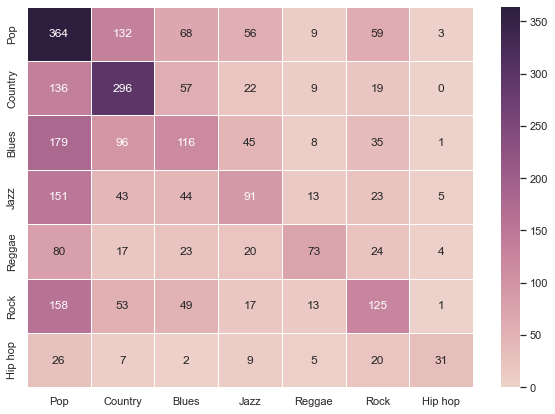

In [36]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
yv_predicted = lr.predict(X_val)
score = lr.score(X_val, y_val)
gl.append(score)
print(score)

cm = pd.DataFrame(confusion_matrix(y_val, yv_predicted), 
                  index = ["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"],
                  columns = ["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_val,yv_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, linewidths =.5, fmt = 'd', cmap = sns.cubehelix_palette(as_cmap = True))
plt.show()

0.3875968992248062
2838


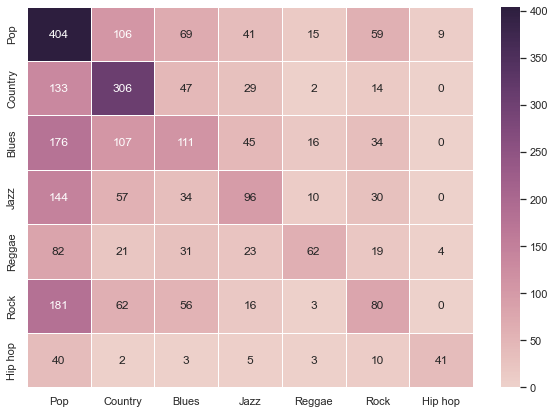

In [37]:
yt_predicted = lr.predict(X_test)
score = lr.score(X_test, y_test)
gl.append(score)
print(score)
cm = pd.DataFrame(confusion_matrix(y_test, yt_predicted), 
                  index = ["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"],
                  columns = ["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_test, yt_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, linewidths =.5, fmt = 'd', cmap = sns.cubehelix_palette(as_cmap = True))
plt.show()

### Bernoulli

0.37433909058865
2837


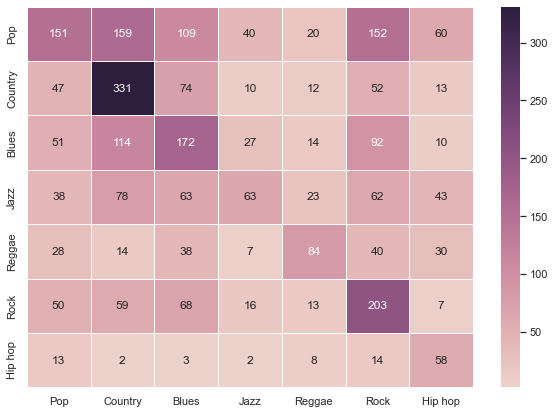

In [38]:
brn = BernoulliNB()
brn.fit(X_train, y_train)
y_predicted = brn.predict(X_val)
score = brn.score(X_val,y_val)
gl.append(score)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"],
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.357646229739253
2838


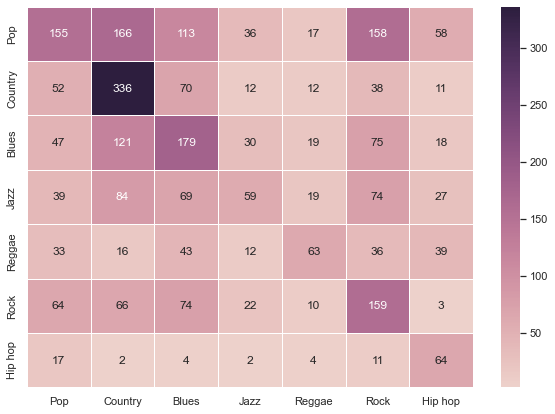

In [39]:
predicted = brn.predict(X_test)
score = brn.score(X_test, y_test)
gl.append(score)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"],
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### Multinomial NB

0.3376806485724357
2837


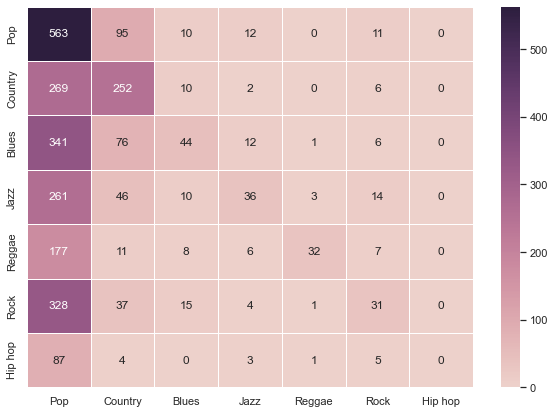

In [40]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_val)
score = clf.score(X_val,y_val)
gl.append(score)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"],
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.3460183227625088
2838


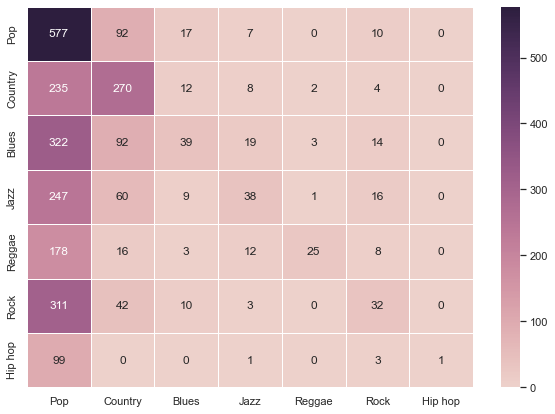

In [41]:
predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)
gl.append(score)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"],
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### Linear SVC

0.36482199506520974
2837


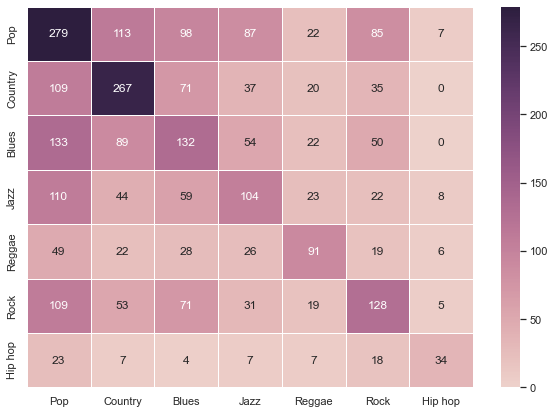

In [42]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_val)
score = clf.score(X_val,y_val)
gl.append(score)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"],
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.3548273431994362
2838


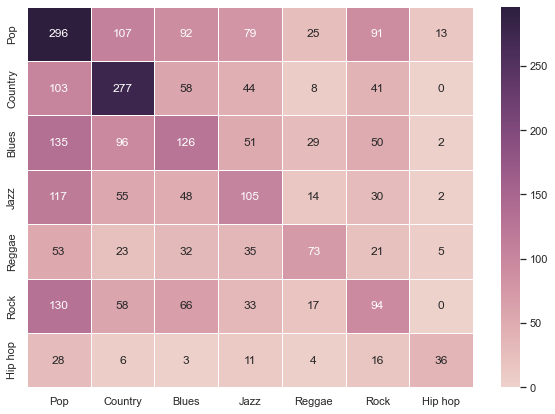

In [43]:
predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)
gl.append(score)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"],
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### NN

In [44]:
y = df['label1'] 

In [45]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

In [46]:
#model
def build_model(nr_labels, length):
    model = Sequential()
    model.add(Embedding(num_words, embed_dim, input_length = length))
    model.add(LSTM(32, return_sequences=True))
    model.add(GlobalMaxPool1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(nr_labels, activation='sigmoid'))
    return model

def build_compiled_model(length):
    model = build_model(nr_labels=7, length = length)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = build_compiled_model(np.max(length))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 199, 32)           907904    
                                                                 
 lstm (LSTM)                 (None, 199, 32)           8320      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                        

In [47]:
#train model
history = model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/5
710/710 [==============================] - 11s 11ms/step - loss: 1.7494 - accuracy: 0.2814 - val_loss: 1.6413 - val_accuracy: 0.3211
Epoch 2/5
710/710 [==============================] - 7s 10ms/step - loss: 1.5599 - accuracy: 0.3823 - val_loss: 1.5868 - val_accuracy: 0.3616
Epoch 3/5
710/710 [==============================] - 7s 10ms/step - loss: 1.3868 - accuracy: 0.4668 - val_loss: 1.5982 - val_accuracy: 0.3715
Epoch 4/5
710/710 [==============================] - 7s 10ms/step - loss: 1.2085 - accuracy: 0.5486 - val_loss: 1.6788 - val_accuracy: 0.3698
Epoch 5/5
710/710 [==============================] - 7s 10ms/step - loss: 1.0295 - accuracy: 0.6290 - val_loss: 1.8227 - val_accuracy: 0.3683


In [48]:
#make predictions
y_pred = np.argmax(model.predict(X_val), axis=1)

On validation data:
Accuracy: 0.37


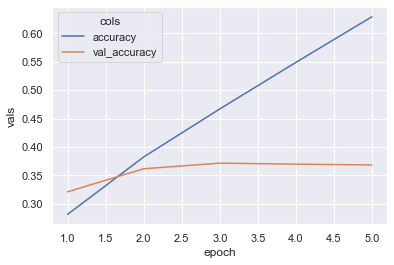

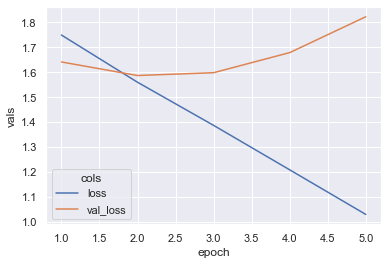

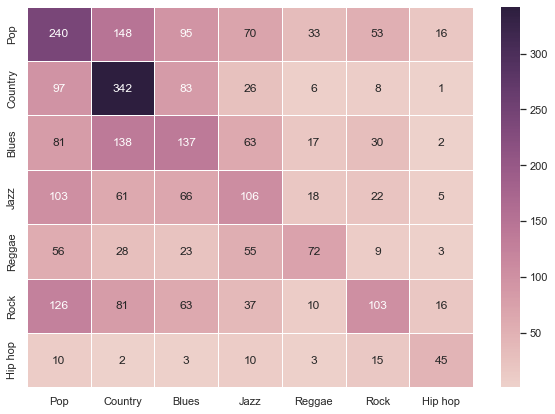

In [49]:
print('On validation data:')
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))
gl.append(accuracy_score(y_val, y_pred))
# plot graphs
metrics_df = pd.DataFrame(history.history).reset_index().rename(columns={"index": "epoch"})
metrics_df['epoch'] = metrics_df['epoch'] + 1
acc_df = metrics_df[['epoch', 'accuracy', 'val_accuracy']].melt('epoch', var_name='cols', value_name='vals')
loss_df = metrics_df[['epoch', 'loss', 'val_loss']].melt('epoch', var_name='cols', value_name='vals')
sns.lineplot(data=acc_df, x='epoch', y='vals', hue='cols')
plt.show()
sns.lineplot(data=loss_df, x='epoch', y='vals', hue='cols')
plt.show()

# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_val, y_pred), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"],
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [50]:
pred = np.argmax(model.predict(X_test), axis=1)

On test data:
Accuracy: 0.38


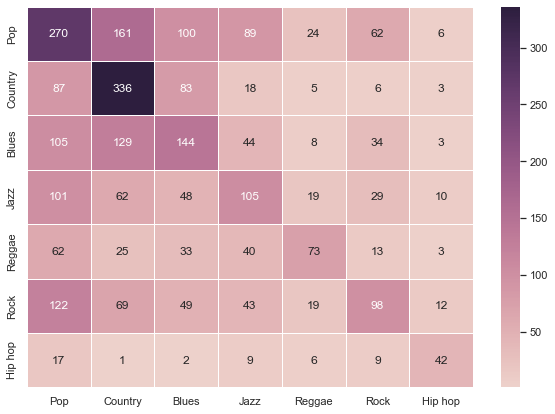

In [51]:
print('On test data:')
print('Accuracy: %.2f' % accuracy_score(y_test, pred))
gl.append(accuracy_score(y_test, pred))
# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"],
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

## Topic Classification by Lyrics

In [52]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X1, df.label2, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

### Logistic Regression

e:\nlp2\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.940077546704265
2837


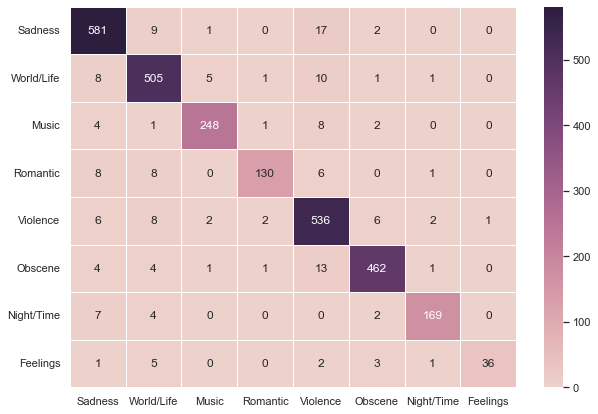

In [53]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
yv_predicted = lr.predict(X_val)
score = lr.score(X_val, y_val)
tl.append(score)
print(score)

cm = pd.DataFrame(confusion_matrix(y_val, yv_predicted), 
                  index = ["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"],
                  columns = ["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_val,yv_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, linewidths =.5, fmt = 'd', cmap = sns.cubehelix_palette(as_cmap = True))
plt.show()

0.9337561663143058
2838


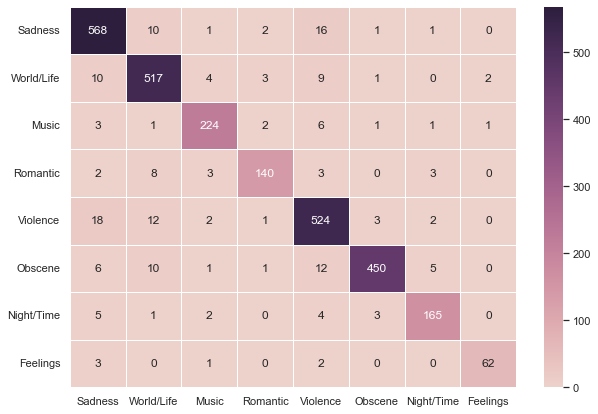

In [54]:
yt_predicted = lr.predict(X_test)
score = lr.score(X_test, y_test)
tl.append(score)
print(score)
cm = pd.DataFrame(confusion_matrix(y_test, yt_predicted), 
                  index = ["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"],
                  columns = ["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_test, yt_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, linewidths =.5, fmt = 'd', cmap = sns.cubehelix_palette(as_cmap = True))
plt.show()

### Bernoulli

0.7423334508283398
2837


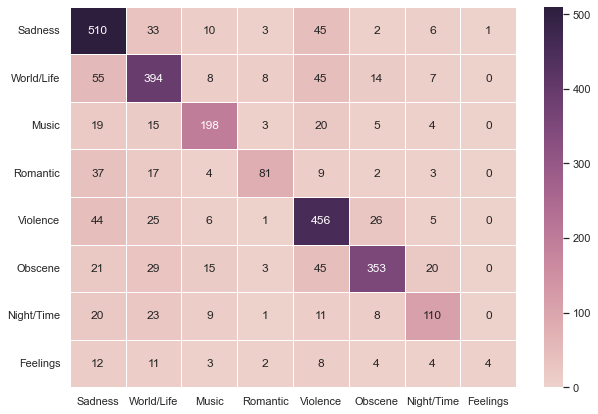

In [55]:
brn = BernoulliNB()
brn.fit(X_train, y_train)
y_predicted = brn.predict(X_val)
score = brn.score(X_val,y_val)
tl.append(score)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted),
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"],
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.7209302325581395
2838


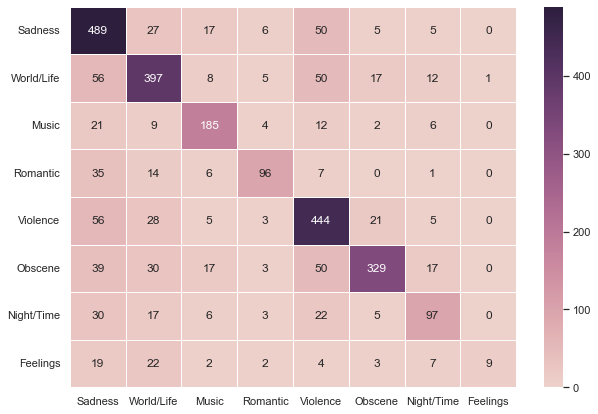

In [56]:
predicted = brn.predict(X_test)
score = brn.score(X_test, y_test)
tl.append(score)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted),
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"],
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### Multinomial NB

0.7715897074374339
2837


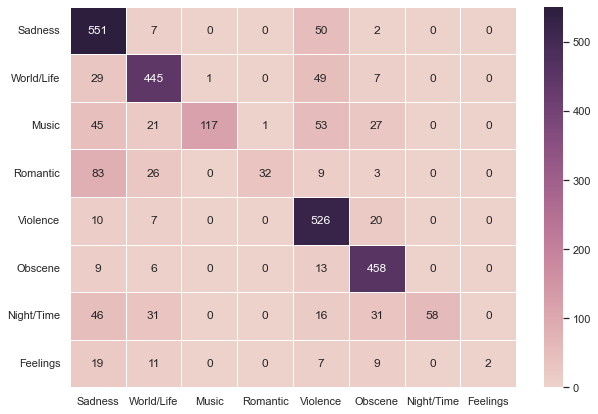

In [57]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_val)
score = clf.score(X_val,y_val)
tl.append(score)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted),
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.7744890768146582
2838


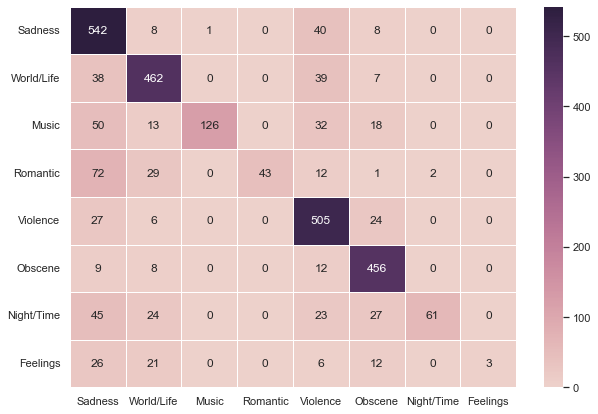

In [58]:
predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)
tl.append(score)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), 
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### Linear SVC

0.936905181529785
2837


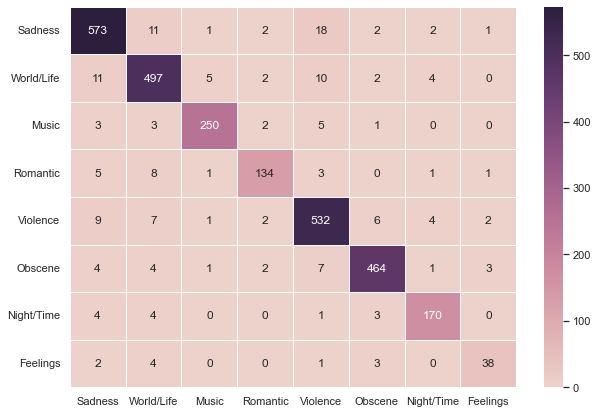

In [59]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_val)
score = clf.score(X_val,y_val)
tl.append(score)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), 
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.9397463002114165
2838


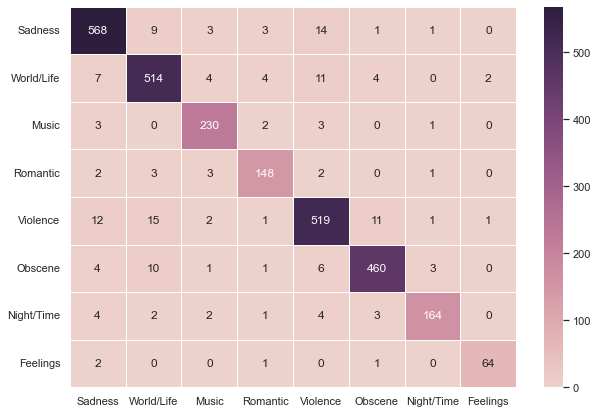

In [60]:
predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)
tl.append(score)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), 
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### NN

In [61]:
y = df['label2']

In [62]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

In [63]:
#model
def build_model(nr_labels, length):
    model = Sequential()
    model.add(Embedding(num_words, embed_dim, input_length = length))
    model.add(LSTM(32, return_sequences=True))
    model.add(GlobalMaxPool1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(nr_labels, activation='sigmoid'))
    return model

def build_compiled_model(length):
    model = build_model(nr_labels=8, length = length)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = build_compiled_model(np.max(length))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 199, 32)           907904    
                                                                 
 lstm_1 (LSTM)               (None, 199, 32)           8320      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                      

In [64]:
#train model
history = model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/5
710/710 [==============================] - 9s 11ms/step - loss: 1.3108 - accuracy: 0.5254 - val_loss: 0.9333 - val_accuracy: 0.6775
Epoch 2/5
710/710 [==============================] - 7s 10ms/step - loss: 0.6481 - accuracy: 0.7807 - val_loss: 0.5757 - val_accuracy: 0.8051
Epoch 3/5
710/710 [==============================] - 7s 10ms/step - loss: 0.3291 - accuracy: 0.8923 - val_loss: 0.4622 - val_accuracy: 0.8484
Epoch 4/5
710/710 [==============================] - 7s 10ms/step - loss: 0.1667 - accuracy: 0.9496 - val_loss: 0.4250 - val_accuracy: 0.8787
Epoch 5/5
710/710 [==============================] - 7s 10ms/step - loss: 0.0935 - accuracy: 0.9730 - val_loss: 0.4545 - val_accuracy: 0.8830


In [65]:
#make predictions
y_pred = np.argmax(model.predict(X_val), axis=1)

On validation data:
Accuracy: 0.88


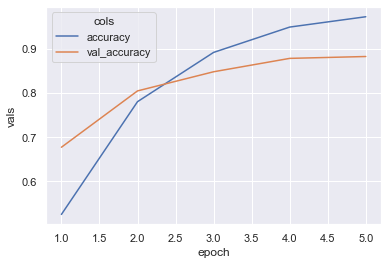

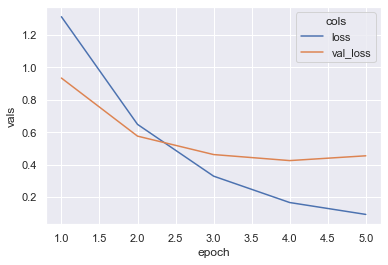

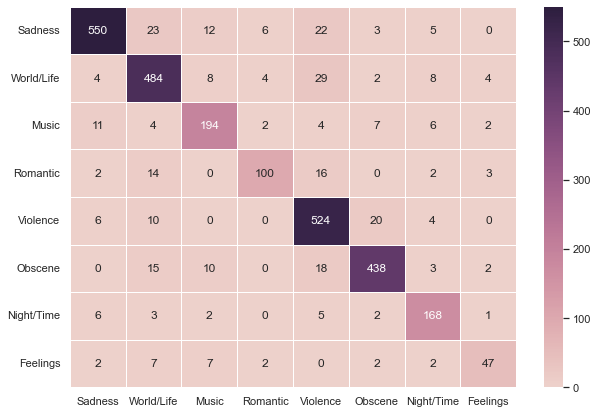

In [66]:
print('On validation data:')
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))
tl.append(accuracy_score(y_val, y_pred))
# plot graphs
metrics_df = pd.DataFrame(history.history).reset_index().rename(columns={"index": "epoch"})
metrics_df['epoch'] = metrics_df['epoch'] + 1
acc_df = metrics_df[['epoch', 'accuracy', 'val_accuracy']].melt('epoch', var_name='cols', value_name='vals')
loss_df = metrics_df[['epoch', 'loss', 'val_loss']].melt('epoch', var_name='cols', value_name='vals')
sns.lineplot(data=acc_df, x='epoch', y='vals', hue='cols')
plt.show()
sns.lineplot(data=loss_df, x='epoch', y='vals', hue='cols')
plt.show()

# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_val, y_pred), 
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [67]:
pred = np.argmax(model.predict(X_test), axis=1)

On test data:
Accuracy: 0.89


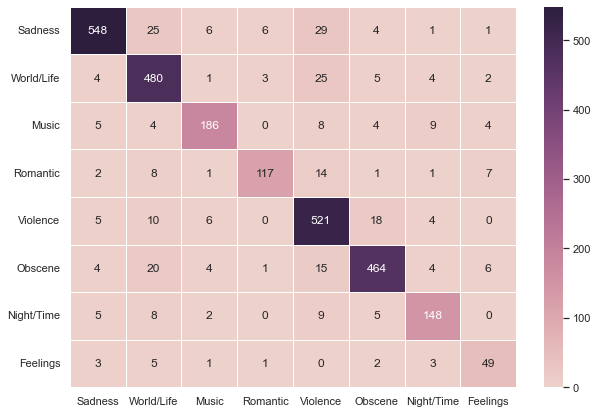

In [68]:
print('On test data:')
print('Accuracy: %.2f' % accuracy_score(y_test, pred))
tl.append(accuracy_score(y_test, pred))
# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), 
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

# Classification By Characteristics

In [69]:
X = df2['features']
y = df2['label1']

In [70]:
X = X.tolist()
y = y.tolist()

In [71]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

## Genre Classification by Characteristics

### Logistic Regression

e:\nlp2\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.2904476559746211
2837


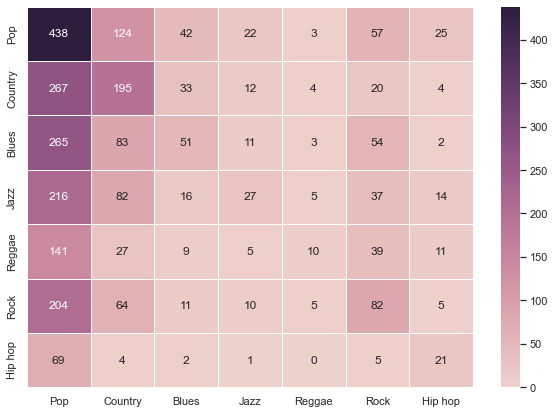

In [72]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
yv_predicted = lr.predict(X_val)
score = lr.score(X_val, y_val)
gc.append(score)
print(score)

cm = pd.DataFrame(confusion_matrix(y_val, yv_predicted), 
                  index = ["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"], 
                  columns = ["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_val,yv_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, linewidths =.5, fmt = 'd', cmap = sns.cubehelix_palette(as_cmap = True))
plt.show()

0.2808315715292459
2838


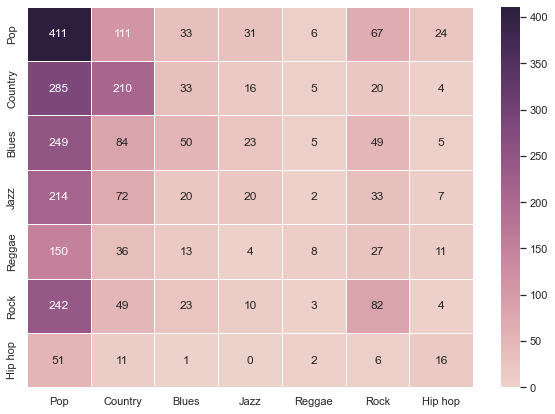

In [73]:
yt_predicted = lr.predict(X_test)
score = lr.score(X_test, y_test)
gc.append(score)
print(score)
cm = pd.DataFrame(confusion_matrix(y_test, yt_predicted), 
                  index = ["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"], 
                  columns = ["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_test, yt_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, linewidths =.5, fmt = 'd', cmap = sns.cubehelix_palette(as_cmap = True))
plt.show()

### Bernoulli

0.2506168487839267
2837


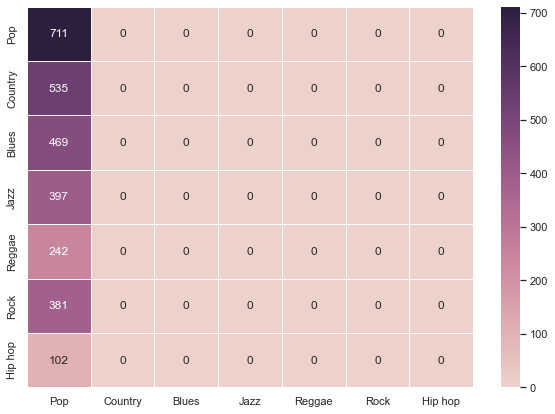

In [74]:
brn = BernoulliNB()
brn.fit(X_train, y_train)
y_predicted = brn.predict(X_val)
score = brn.score(X_val,y_val)
gc.append(score)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"], 
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.24066243833685694
2838


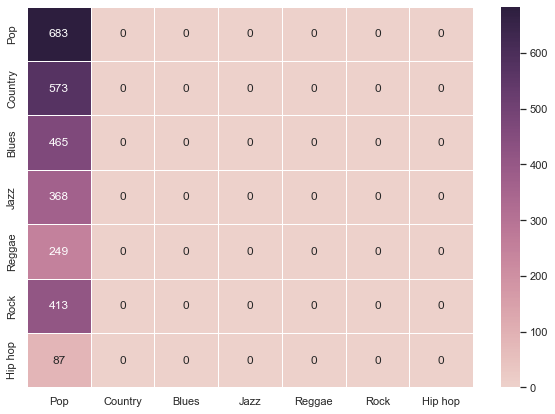

In [75]:
predicted = brn.predict(X_test)
score = brn.score(X_test, y_test)
gc.append(score)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"], 
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### Multinomial NB

0.2516743038420867
2837


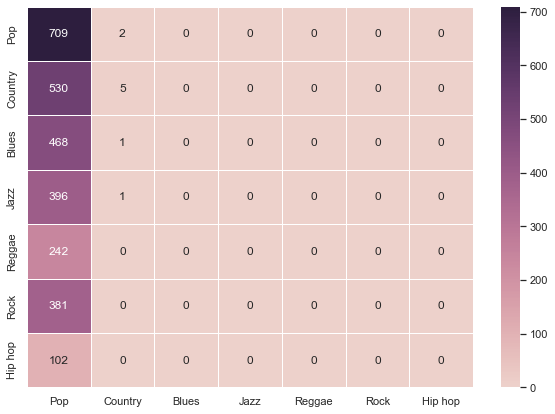

In [76]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_val)
score = clf.score(X_val,y_val)
gc.append(score)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"], 
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.24171952078928824
2838


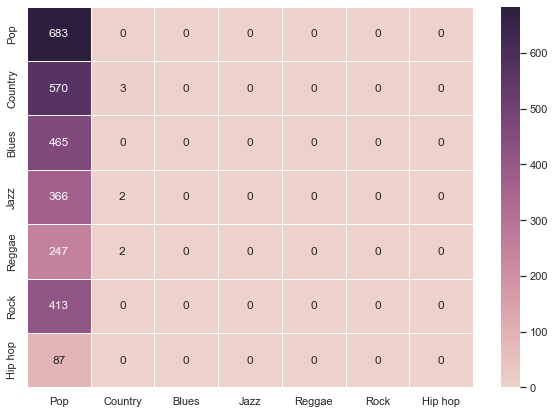

In [77]:
predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)
gc.append(score)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"], 
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### Linear SVC

0.2858653507225943
2837


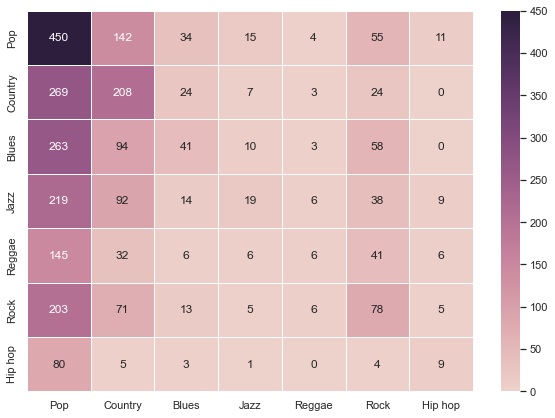

In [78]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_val)
score = clf.score(X_val,y_val)
gc.append(score)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"], 
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.2843551797040169
2838


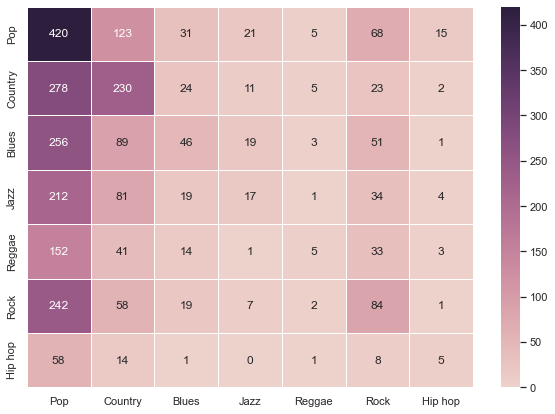

In [79]:
predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)
gc.append(score)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"], 
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### NN

In [80]:
def build_model(nr_labels):
    model = Sequential()
    model.add(Dense(32, activation='relu',input_shape=(16,)))
    model.add(Dense(nr_labels, activation='softmax'))

    return model

def build_compiled_model(length):
    model = build_model(nr_labels=7)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = build_compiled_model(np.max(length))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 775
Trainable params: 775
Non-trainable params: 0
_________________________________________________________________


In [81]:
#train model
history = model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/5
710/710 [==============================] - 3s 4ms/step - loss: 1.7999 - accuracy: 0.2496 - val_loss: 1.7538 - val_accuracy: 0.2785
Epoch 2/5
710/710 [==============================] - 2s 3ms/step - loss: 1.7446 - accuracy: 0.2718 - val_loss: 1.7348 - val_accuracy: 0.2781
Epoch 3/5
710/710 [==============================] - 2s 3ms/step - loss: 1.7348 - accuracy: 0.2755 - val_loss: 1.7277 - val_accuracy: 0.2838
Epoch 4/5
710/710 [==============================] - 2s 3ms/step - loss: 1.7315 - accuracy: 0.2790 - val_loss: 1.7270 - val_accuracy: 0.2820
Epoch 5/5
710/710 [==============================] - 2s 3ms/step - loss: 1.7288 - accuracy: 0.2797 - val_loss: 1.7252 - val_accuracy: 0.2883


In [82]:
#make predictions
y_pred = np.argmax(model.predict(X_val), axis=1)

On validation data:
Accuracy: 0.29


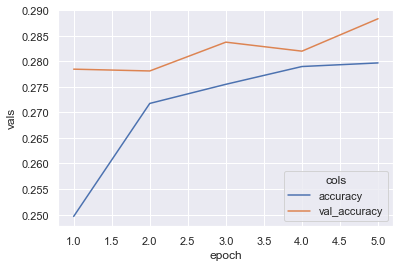

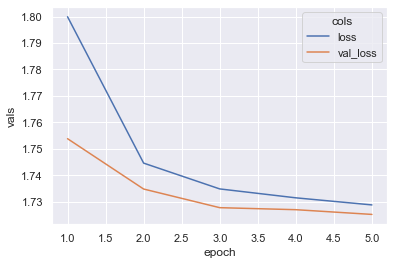

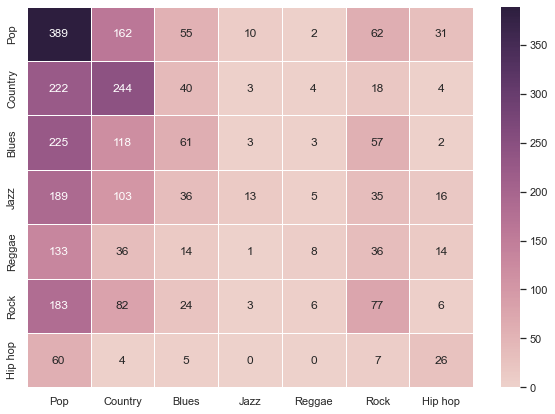

In [83]:
print('On validation data:')
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))
gc.append(accuracy_score(y_val, y_pred))
# plot graphs
metrics_df = pd.DataFrame(history.history).reset_index().rename(columns={"index": "epoch"})
metrics_df['epoch'] = metrics_df['epoch'] + 1
acc_df = metrics_df[['epoch', 'accuracy', 'val_accuracy']].melt('epoch', var_name='cols', value_name='vals')
loss_df = metrics_df[['epoch', 'loss', 'val_loss']].melt('epoch', var_name='cols', value_name='vals')
sns.lineplot(data=acc_df, x='epoch', y='vals', hue='cols')
plt.show()
sns.lineplot(data=loss_df, x='epoch', y='vals', hue='cols')
plt.show()

# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_val, y_pred), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"], 
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [84]:
pred = np.argmax(model.predict(X_test), axis=1)

On test data:
Accuracy: 0.28


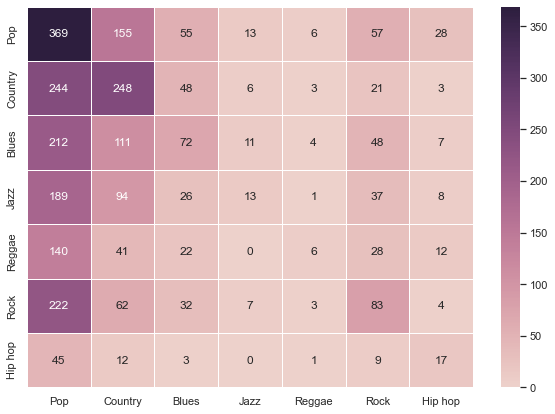

In [85]:
print('On test data:')
print('Accuracy: %.2f' % accuracy_score(y_test, pred))
gc.append(accuracy_score(y_test, pred))
# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), 
                     index=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"], 
                     columns=["Pop","Country","Blues","Jazz","Reggae","Rock", "Hip hop"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

## Topic Classification by Characteristics

In [86]:
y = df2['label2']
y = y.tolist()
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

### Logistic Regression

0.9954176947479733
2837


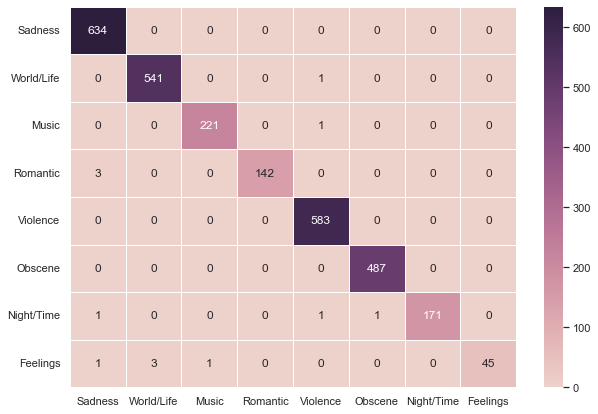

In [87]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
yv_predicted = lr.predict(X_val)
score = lr.score(X_val, y_val)
tc.append(score)
print(score)

cm = pd.DataFrame(confusion_matrix(y_val, yv_predicted), 
                  index = ["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                  columns = ["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_val,yv_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, linewidths =.5, fmt = 'd', cmap = sns.cubehelix_palette(as_cmap = True))
plt.show()

0.9968287526427061
2838


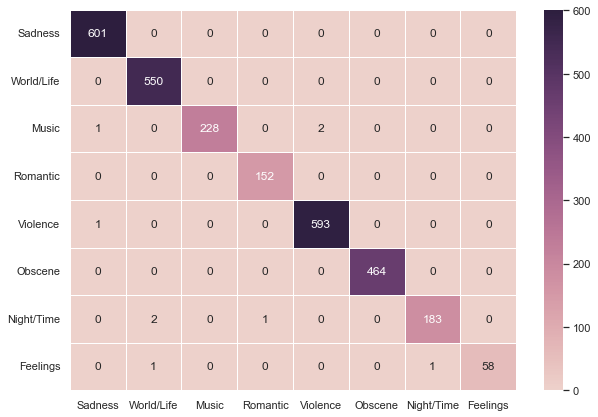

In [88]:
yt_predicted = lr.predict(X_test)
score = lr.score(X_test, y_test)
tc.append(score)
print(score)
cm = pd.DataFrame(confusion_matrix(y_test, yt_predicted), 
                  index = ["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                  columns = ["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_test, yt_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, linewidths =.5, fmt = 'd', cmap = sns.cubehelix_palette(as_cmap = True))
plt.show()

### Bernouli

0.22347550229115262
2837


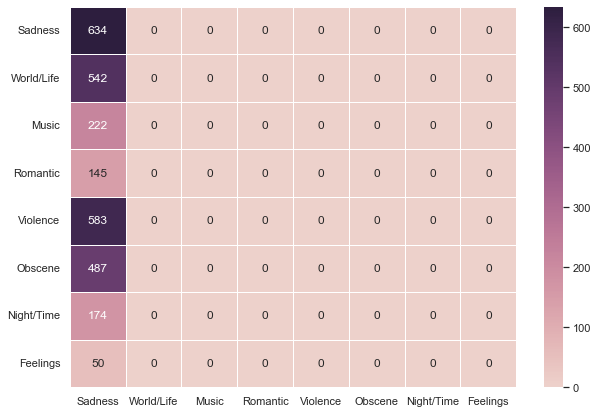

In [89]:
brn = BernoulliNB()
brn.fit(X_train, y_train)
y_predicted = brn.predict(X_val)
score = brn.score(X_val,y_val)
tc.append(score)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), 
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.21176885130373502
2838


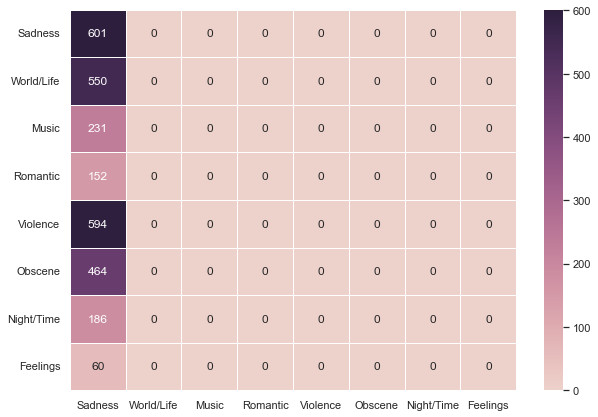

In [90]:
predicted = brn.predict(X_test)
score = brn.score(X_test, y_test)
tc.append(score)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), 
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### Multinomial NB

0.833627070849489
2837


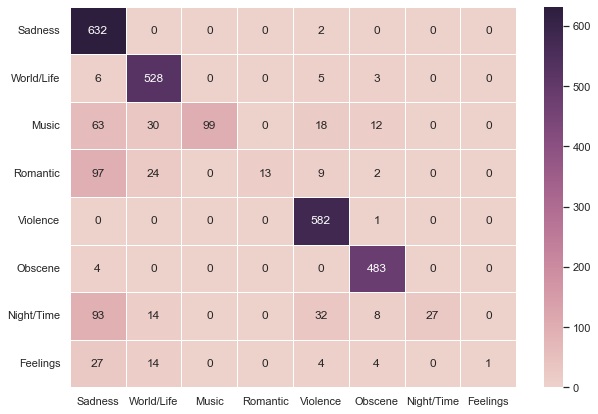

In [91]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_val)
score = clf.score(X_val,y_val)
tc.append(score)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), 
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.8132487667371389
2838


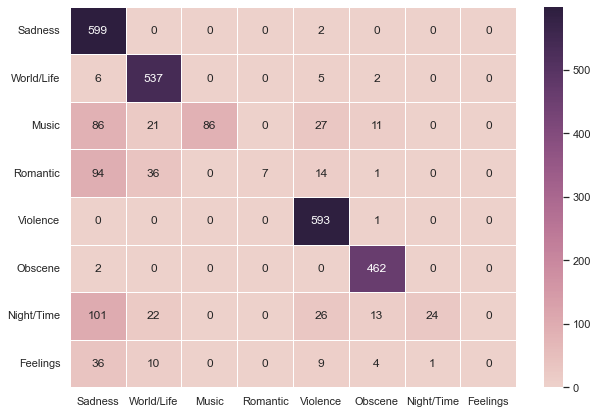

In [92]:
predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)
tc.append(score)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), 
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### Linear SVC

0.9954176947479733
2837


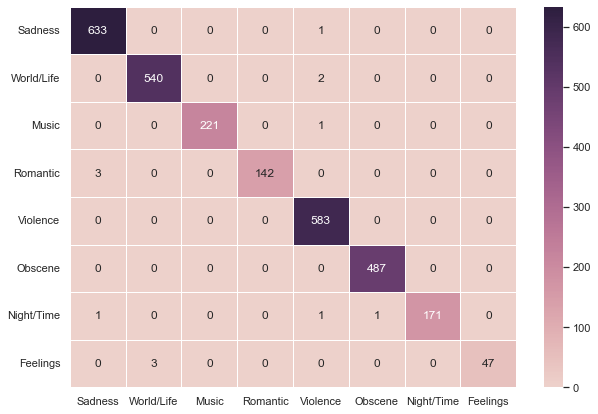

In [93]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_val)
score = clf.score(X_val,y_val)
tc.append(score)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), 
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.9964763918252291
2838


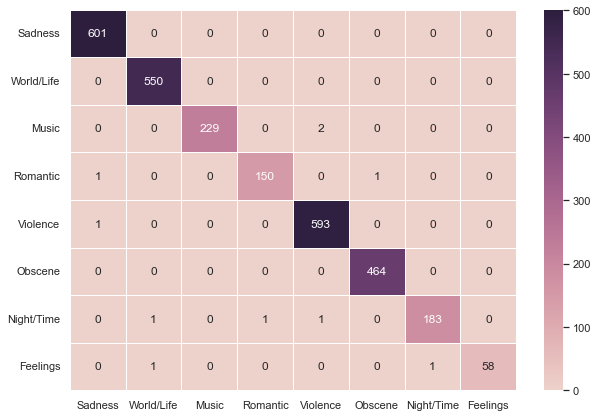

In [94]:
predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)
tc.append(score)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), 
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### NN

In [95]:
def build_model(nr_labels):
    model = Sequential()
    model.add(Dense(32, activation='relu',input_shape=(16,)))
    model.add(Dense(nr_labels, activation='softmax'))

    return model

def build_compiled_model(length):
    model = build_model(nr_labels=8)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = build_compiled_model(np.max(length))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
Total params: 808
Trainable params: 808
Non-trainable params: 0
_________________________________________________________________


In [96]:
#train model
history = model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/5
710/710 [==============================] - 3s 4ms/step - loss: 0.9090 - accuracy: 0.8472 - val_loss: 0.2225 - val_accuracy: 0.9781
Epoch 2/5
710/710 [==============================] - 2s 3ms/step - loss: 0.1350 - accuracy: 0.9847 - val_loss: 0.0788 - val_accuracy: 0.9908
Epoch 3/5
710/710 [==============================] - 2s 3ms/step - loss: 0.0638 - accuracy: 0.9918 - val_loss: 0.0498 - val_accuracy: 0.9940
Epoch 4/5
710/710 [==============================] - 2s 3ms/step - loss: 0.0436 - accuracy: 0.9947 - val_loss: 0.0382 - val_accuracy: 0.9944
Epoch 5/5
710/710 [==============================] - 2s 3ms/step - loss: 0.0344 - accuracy: 0.9956 - val_loss: 0.0320 - val_accuracy: 0.9944


In [97]:
#make predictions
y_pred = np.argmax(model.predict(X_val), axis=1)

On validation data:
Accuracy: 0.99


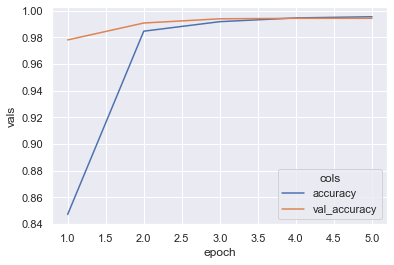

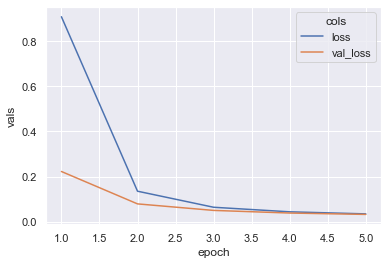

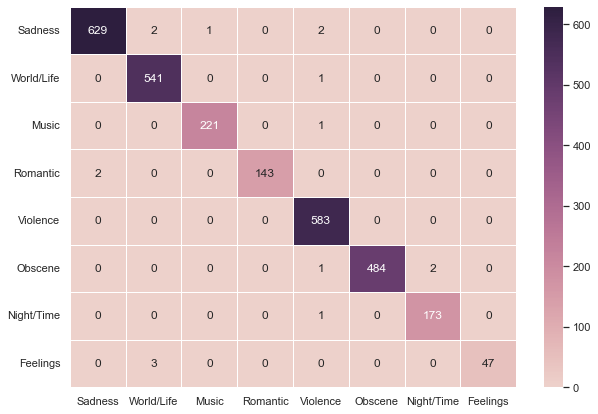

In [98]:
print('On validation data:')
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))
tc.append(accuracy_score(y_val, y_pred))
# plot graphs
metrics_df = pd.DataFrame(history.history).reset_index().rename(columns={"index": "epoch"})
metrics_df['epoch'] = metrics_df['epoch'] + 1
acc_df = metrics_df[['epoch', 'accuracy', 'val_accuracy']].melt('epoch', var_name='cols', value_name='vals')
loss_df = metrics_df[['epoch', 'loss', 'val_loss']].melt('epoch', var_name='cols', value_name='vals')
sns.lineplot(data=acc_df, x='epoch', y='vals', hue='cols')
plt.show()
sns.lineplot(data=loss_df, x='epoch', y='vals', hue='cols')
plt.show()

# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_val, y_pred), 
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [99]:
pred = np.argmax(model.predict(X_test), axis=1)

On test data:
Accuracy: 0.99


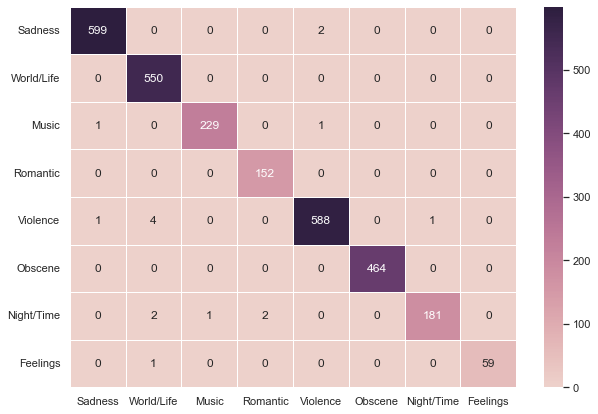

In [100]:
print('On test data:')
print('Accuracy: %.2f' % accuracy_score(y_test, pred))
tc.append(accuracy_score(y_test, pred))
# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), 
                     index=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"], 
                     columns=["Sadness", "World/Life", "Music", "Romantic", "Violence", "Obscene", "Night/Time", "Feelings"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [101]:
column_labels=["Genre by Lyrics", "Topic by Lyrics","Genre by Characteritics", "Topic by Characteristics"]
row_labels = ["Logistic Regression Val Acc", "Logistic Regression Test Acc",
              "Bernoulli Val Acc", "Bernoulli Test Acc",
              "MultinomialNB Val Acc", "MultinomialNB Test Acc",
              "LinearSVC Val Acc", "LinearSVC Test Acc",
              "NN Val Acc", "NN Test Acc"]

In [102]:
gl = [round(x,2) for x in gl]
tl = [round(x,2) for x in tl]
gc = [round(x,2) for x in gc]
tc = [round(x,2) for x in tc]

In [106]:
gl = [str(a) for a in gl]
tl = [str(a) for a in tl]
gc = [str(a) for a in gc]
tc = [str(a) for a in tc]

In [109]:
results = pd.DataFrame(index = row_labels, columns = column_labels)
results["Genre by Lyrics"] = gl
results["Topic by Lyrics"] = tl
results["Genre by Characteritics"] = gc
results["Topic by Characteristics"] = tc

In [110]:

results.style.set_properties(**{'text-align': 'center'})